Àlgebra Lineal Numèrica - Curs 2024/2025 - Óscar Rodríguez

---

# **Pràctica 2: L' Equació de la calor estacionària**

## Objectiu principal:



*   Construir i programar de manera eficient el mètode de Jacobi per tal de resoldre un problema de calor estacionari.



## Introducció:

### **L'equació de la calor**

> #### **Definició:**
>
> L'equació de la calor és una equació diferencial parcial (EDP) que relaciona la variació temporal i espacial de la temperatura en un medi. Matemàticament, aquesta equació ve donada per:
>
> $$\frac{\partial u}{\partial t} = k \Delta u + f$$
>
> on
>
> * $u=u(\boldsymbol{x},t)$ representa la temperatura en el punt $\boldsymbol{x}$ del domini $\Omega$ a l'instant de temps $t$.
>
> * $k$ denota la conductivitat tèrmica del material (propietat que descriu la seva capacitat per transmetre la calor).
>
> * $\Delta$ és l'operador laplacià, que quantifica la variació espacial de la temperatura, el qual veurem més endavant.
>
> * $f = f(\boldsymbol{x},t)$ és la funció font, que representa la generació de calor en el medi en cada punt $\boldsymbol{x}\in\Omega$ i en cada instant $t$.
>
>Usualment $\Omega\subset\mathbb{R}^n$ amb $n=1,2,3$.


&nbsp;



Anem a veure els diferents ingredients d'aquesta equació:

> #### **El Laplacià**:
>
> Formalment, l'operador Laplacià d'una funció escalar $u(\boldsymbol{x})$, on $\boldsymbol{x} = (x_1,x_2,\ldots,x_n)\in\mathbb{R}^n$ es defineix com la suma de les segones derivades de la funció $u$ respecte a cada una de les coordenades:
>
> $$\Delta u = \sum_{k= 1}^n\frac{\partial^2 u}{\partial x_k^2} =  \frac{\partial^2 u}{\partial x_1^2} + \frac{\partial^2 u}{\partial x_2^2} +\ldots + \frac{\partial^2 u}{\partial x_n^2}.$$
>
> &nbsp;
> > ##### 🟢 *Exemple*
> >
> > El laplacià de la funció $f(x_1,x_2) = x_1^2x_2^2 -\cos(x_1)$ ve donat per:
> > $$\Delta f(x_1,x_2) = \color{blue}{\frac{\partial^2 f}{\partial x_1^2}} + \color{red}{\frac{\partial^2 f}{\partial x_2^2}} = \color{blue}{2x_2^2 + \cos(x_1)} + \color{red}{2x_1^2} = 2(x_1^2+x_2^2) + \cos(x_1)$$
> >
> &nbsp;
>
> En el context  de l'equació de la calor, el Laplacià de la temperatura $u(\boldsymbol{x},t)$  descriu com la temperatura varia espacialment en un medi i, per tant, tindrem:
>
>$$\Delta u (\boldsymbol{x},t) = \sum_{k= 1}^n\frac{\partial^2 u(\boldsymbol{x},t)}{\partial x_k^2} = \frac{\partial^2 u}{\partial x_1^2}(\boldsymbol{x},t) + \frac{\partial^2 u}{\partial x_2^2}(\boldsymbol{x},t) +\ldots + \frac{\partial^2 u}{\partial x_n^2}(\boldsymbol{x},t).$$

&nbsp;

> #### **El domini** $\Omega$:
>
> El domini $\Omega$ representa la regió espacial en què s'està estudiant el comportament del sistema físic. És fonamental definir aquest domini amb precisió per a formular correctament el problema i trobar solucions significatives. El domini pot ser un subconjunt de l'espai $n$-dimensional on es desenvolupa el fenomen, així és típic considerar des de dominis unidimensionals fins a dominis tridimensionals, segons la naturalesa del problema.
>
> Per a resoldre el problema de manera única és necessària imposar condicions de frontera al domini. Aquestes condicions fixen el comportament de la solució en els límits del domini $\Omega$, delimitant el problema i donant-li un sentit físic.
Hi ha diversos tipus de condicions de frontera que poden ser imposades, i la seva elecció depèn de la naturalesa del problema i de les seves característiques físiques.
Alguns dels tipus de condicions de frontera més comuns són:
>
> * **Condicions de Dirichlet**: Aquestes condicions fixen el valor de la solució en els límits del domini $\Omega$. Matemàticament, es pot expressar com $u(x, t) = g(x, t)$, on $g(x, t)$ és una funció donada.
>    
> * **Condicions de Neumann**: Aquestes condicions fixen la derivada normal de la solució en els límits del domini $\Omega$. Matemàticament, es pot expressar com $\frac{\partial u}{\partial n}(x, t) = h(x, t)$, on $\frac{\partial u}{\partial n}$ és la derivada normal de $u$ i $h(x, t)$ és una funció donada.
>
>
> &nbsp;
>
> > ##### 🟢 *Exemple:*
> >
> > Considerem el domini $\Omega = \{ (x,y)\in\mathbb{R}^2 \,:\, x^2+y^2 \leq 1\}$ i considerem les següents condicions a la frontera de $\Omega$, la qual denotarem per $\delta\Omega$:
> >
> > * $u((x,y),t)=x$ per $\{x\geq 0\} \cap \delta\Omega$ i $\forall t$
> >
> > * $u((x,y),t)=0$ per $\{x< 0\} \cap \delta\Omega$ i $\forall t$
> >
> > Gràficament tindríem:
> >
> > 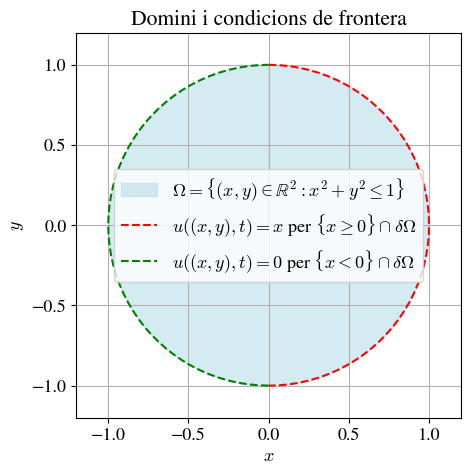
> >
>
> &nbsp;
>
> ⚠️ En aquesta pràctica únicament considerarem condicions de frontera de Dirichlet

&nbsp;

> #### **Condició inicial**
>
> Per a resoldre aquesta EDP necessitem un punt de partida, una condició inicial que ens denota la temperatura inicial al domini $\Omega$ en l'instant de temps $t_0$.
>
> Normalment, notem aquesta condició per $u_{t_0}(\boldsymbol{x}) = u(\boldsymbol{x},t_0)$.

&nbsp;

> #### **El terme font**
>
> El terme font en l'equació de la calor és una funció que representa la font o la font d'energia que genera o absorbeix calor en un sistema. Aquest terme pot representar, per exemple, una font externa de calor com una font de calor que s'afegeix al sistema, o pot reflectir la generació interna de calor dins del mateix sistema.
>
> En cas que no hi hagi terme font (és a dir, $f(\boldsymbol{x},t) \equiv 0 $) direm que l'equació de la calor és **homogènia**.

&nbsp;
>

> #### **Equació estacionària**
>
> L'equació de la calor estacionària descriu la distribució d'una quantitat de calor en un sistema quan aquest ha arribat a un estat d'equilibri tèrmic, és a dir, quan la temperatura en el sistema ja no canvia amb el temps. En aquest estat, la variació de la temperatura respecte al temps és zero en tot el domini del sistema.
>
> **L'equació de la calor estacionària** es representa matemàticament com una equació en derivades parcials, que estableix l'equilibri entre la conducció de calor a través del material i les fonts de calor presents en el sistema. La forma més comuna de l'equació de la calor estacionària és:
>
>$$\Delta u = -F(\boldsymbol{x})$$
>
>&nbsp;
>
>De la mateixa manera, en el cas que $F(\boldsymbol{x})\equiv 0$ estarem en el cas de l'equació de la calor **homogènia** i estacionària.
>

&nbsp;

### **El mètode de les diferències finites: Cas 1D**

El mètode de les diferències finites és una tècnica numèrica utilitzada per resoldre equacions diferencials, incloent-hi equacions en derivades parcials. Consisteix a discretitzar l'espai i el temps del domini de la solució i aproximar les derivades en els punts de la xarxa de discretització mitjançant diferències finites.

&nbsp;

Ho veurem únicament pel cas de l'equació de la calor estacionària.

&nbsp;

> #### **Idea:**
>
> Considerem el problema:
> $$\left\{\begin{aligned}& \Delta u(x) = - F(x),\quad \forall x\in[a,b],\\&u(a) = c_a,\\&u(b) = c_b,\end{aligned}\right.$$
> amb $c_a$ i $c_b$ constants donades.
>
> En lloc de trobar la solució $u(x)$ per tot $x\in[a,b]$ ens conformarem amb trobar la solució aproximada $u_i$ en certs punts $x_i\in[a,b]$ amb $i=0,1,\ldots,N$ i satisfent que $x_0 = a$ i $x_N=b$ tals que $u_i\approx u(x_i)$.
>
>
> 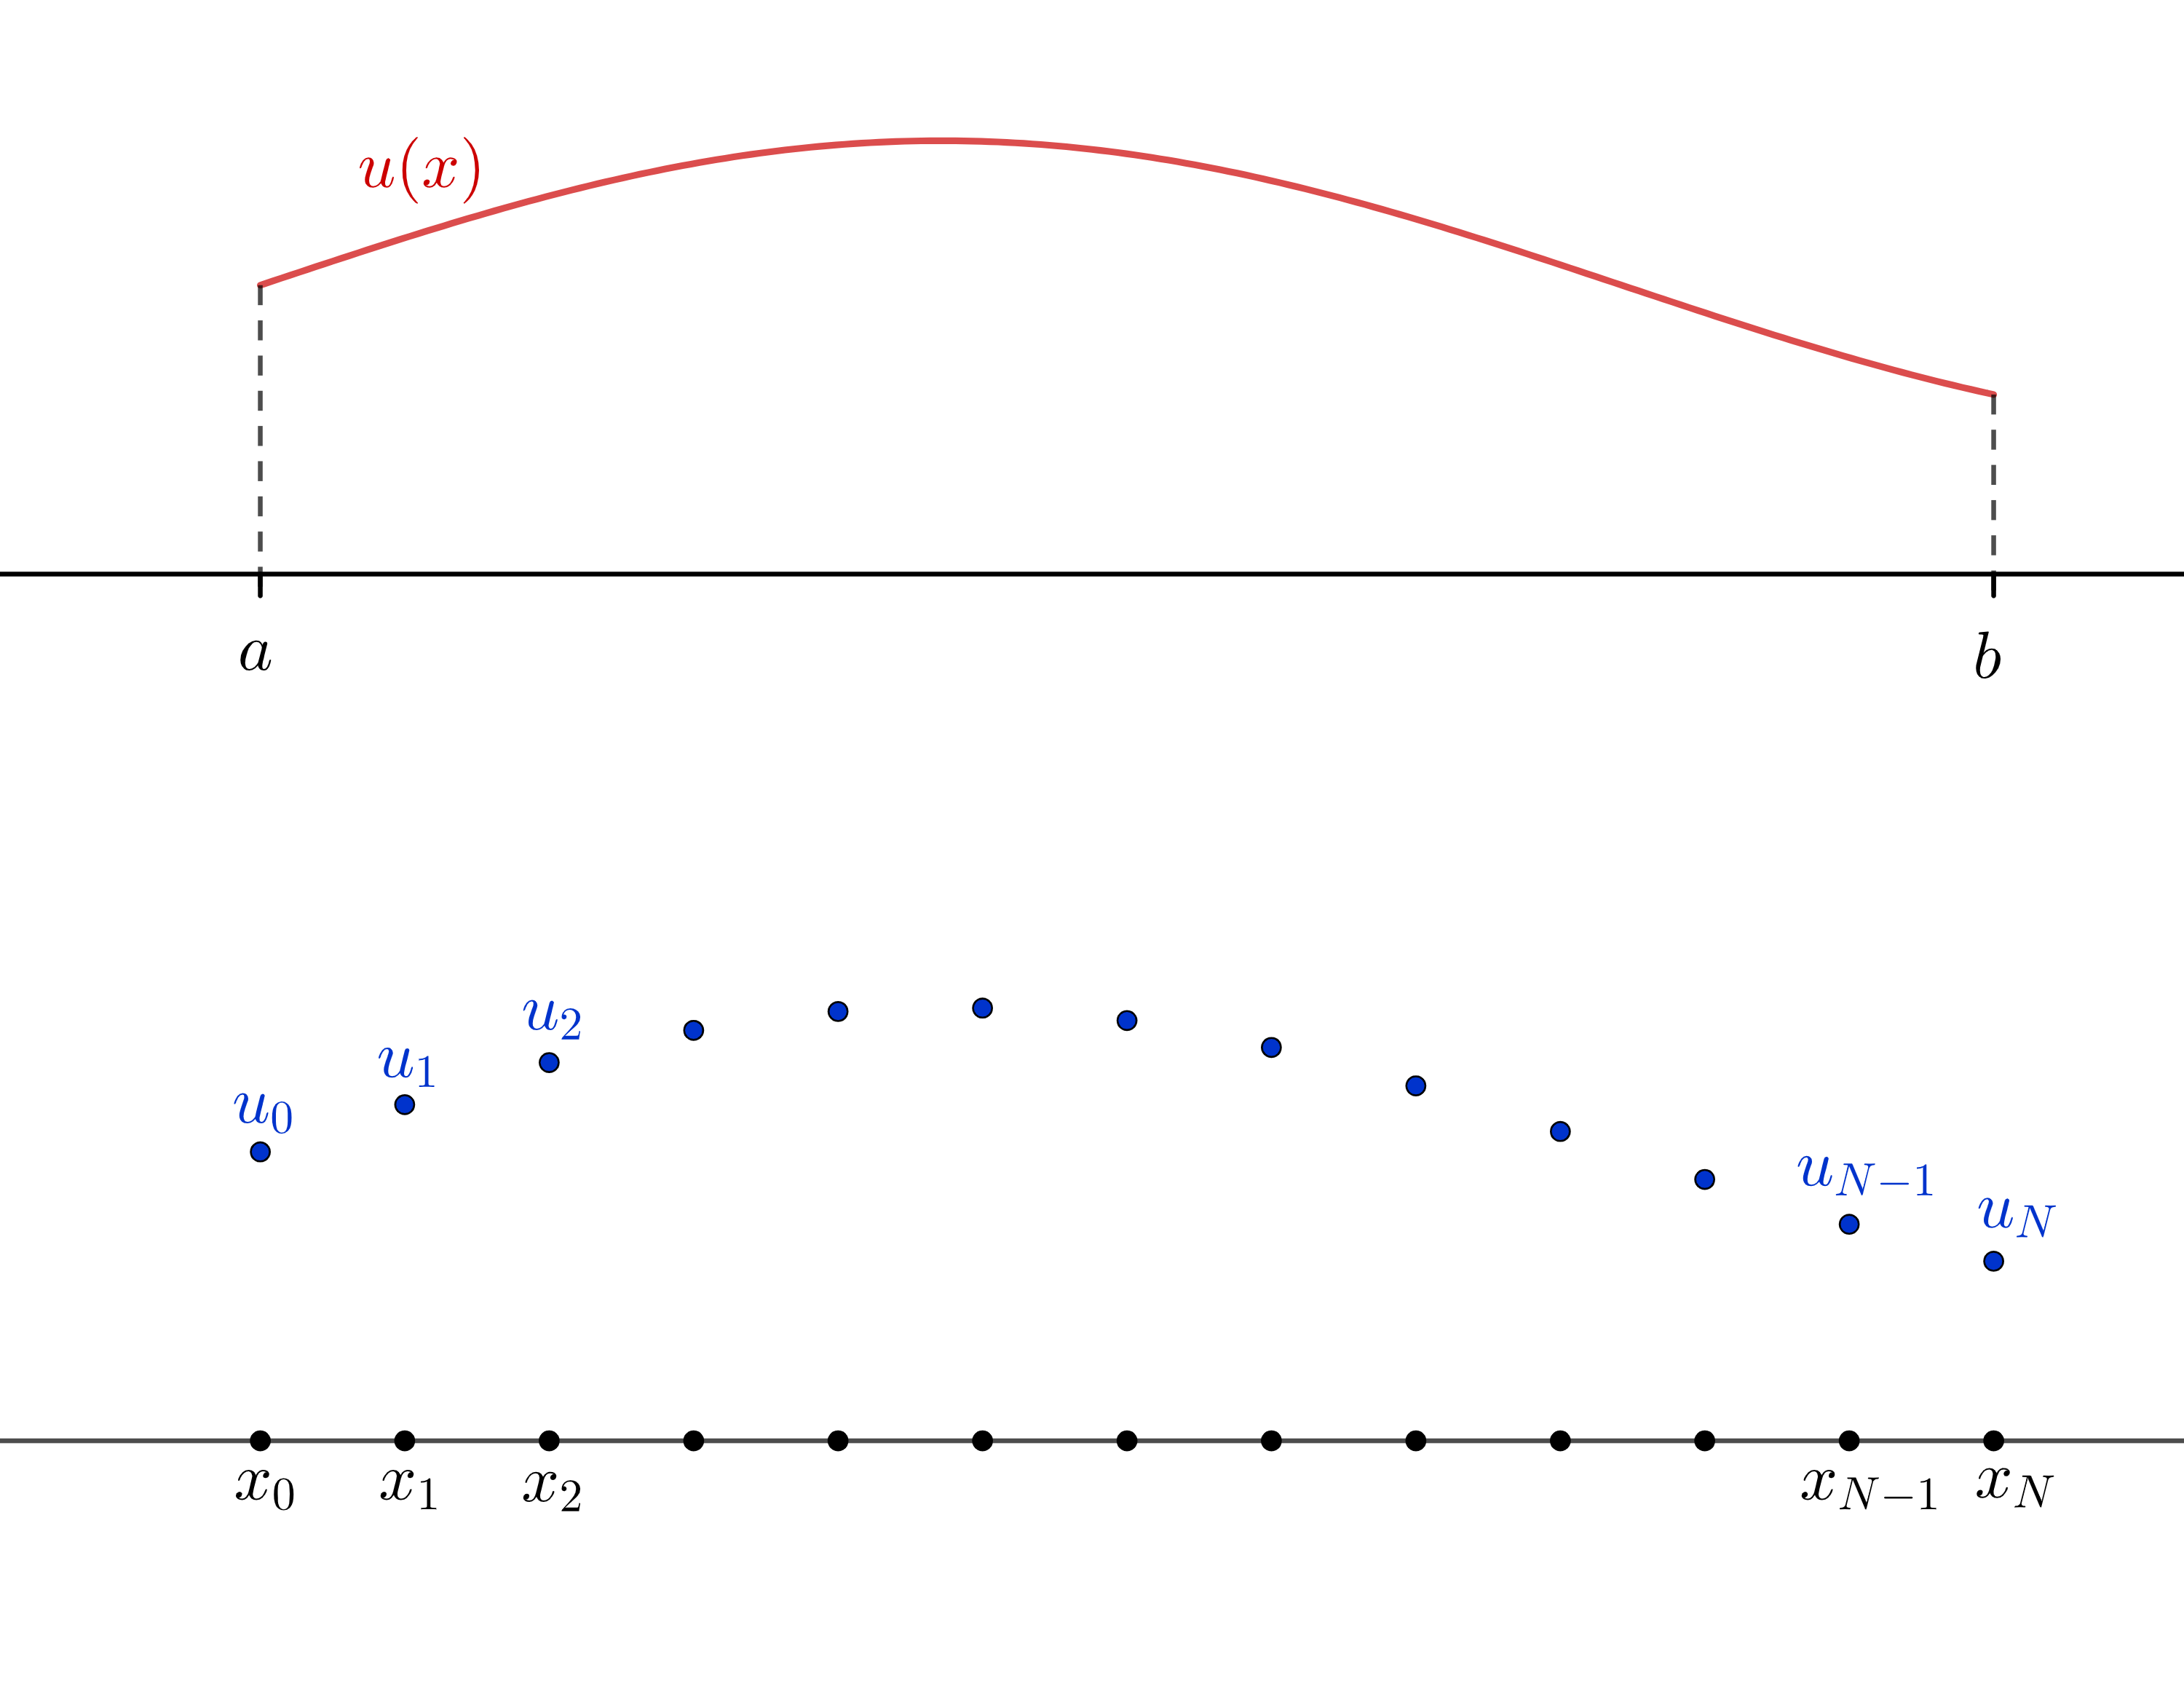
>
> Per facilitat, suposarem que els punts $x_i$ estan equiespaitas, és a dir:
>
> $\quad x_i = a + h\cdot i,\quad$ amb $\displaystyle h=\frac{b-a}{N}$.
>
> &nbsp;
>
> D'aquesta manera, en lloc d'imposar l'equació a tot punt del domini $[a,b]$ ho farem únicament als punts $x_i$. És a dir, volem que
>
> $$\Delta u(x_i) = -F(x_i),\quad \forall i = 1,\ldots,N-1$$
>
> Ara bé, en comptes d'imposar directament aquesta equació, imposarem una aproximació numèrica.

&nbsp;

> #### **Aproximació numèrica de derivades**
>
> Sigui $f:\mathbb{R}\longrightarrow\mathbb{R}$ una funció prou regular.
> Aleshores:
>
> $$\begin{aligned}&f'(x_0) = \frac{f(x_0+h)-f(x_0-h)}{2h} + \mathcal{O}(h^2),\\&f''(x_0) = \frac{f(x_0+h)-2f(x_0)+f(x_0+h)}{h^2} + \mathcal{O}(h^2).\end{aligned}$$
>
> > ##### *Demostració: via Taylor*
> >
> > *Recordem que si $f:\mathbb{R}\rightarrow\mathbb{R}$ és una funció, el seu desenvolupament de Taylor al punt $x_0$ ve donat per:*
> >
> > $$f(x_0 + h) = f(x_0) + f'(x_0)h + \frac{f''(x_0)}{2!}h^2 + \frac{f'''(x_0)}{3!} h^3 + \mathcal{O}(h^4),$$
> >
> > *i, anàlogament:*
> >
> > $$ f(x_0 - h) = f(x_0) - f'(x_0)h + \frac{f''(x_0)}{2!}h^2 - \frac{f'''(x_0)}{3!} h^3 + \mathcal{O}(h^4).$$
> >
> > &nbsp;
> >
> > ###### ***Aproximació (centrada) de la primera derivada:***
> >
> > *Si a la primera equació li restem la segona, obtenim:*
> >
> > $$\begin{aligned} f(x_0 + h) - f(x_0-h) &= f(x_0) + f'(x_0)h + \frac{f''(x_0)}{2!}h^2 + \frac{f'''(x_0)}{3!} h^3 + \mathcal{O}(h^4)\\
&\hspace{3mm} - \left(f(x_0) - f'(x_0)h + \frac{f''(x_0)}{2!}h^2 - \frac{f'''(x_0)}{3!} h^3 + \mathcal{O}(h^4)\right)\\
& = 2f'(x_0)h + \mathcal{O}(h^3).
\end{aligned}$$
> >
> > *Dividint a banda i banda per $2h$, tenim l'aproximació centrada de la primera derivada:*
> > $$f'(x_0) = \frac{f(x_0 + h) - f(x_0-h)}{2h} + \mathcal{O}(h^2) $$
> >
> >
> >&nbsp;
> >
> > ###### ***Aproximació de la segona derivada:***
> >
> > *Si sumem els dos desenvolupaments de Taylor anteriors, obtenim:*
> >
> > $$\begin{aligned}
f(x_0 + h) + f(x_0-h) &= f(x_0) + f'(x_0)h + \frac{f''(x_0)}{2!}h^2 + \frac{f'''(x_0)}{3!} h^3 + \mathcal{O}(h^4)\\
&\hspace{3mm} + \left(f(x_0) - f'(x_0)h + \frac{f''(x_0)}{2!}h^2 - \frac{f'''(x_0)}{3!} h^3 + \mathcal{O}(h^4)\right)\\
& = 2f(x_0) +  f''(x_0)h^2 + \mathcal{O}(h^4).
\end{aligned}
$$
> >
> > *Aïllant $f''(x_0)$ arribem a:*
> >
> > $$f''(x_0) = \frac{f(x_0 + h)- 2f(x_0) + f(x_0-h)}{h^2} + \mathcal{O}(h^2).\quad \square$$
> >
>
> &nbsp;

&nbsp;

> #### **Mètode de les diferències finites: cas 1D**
>
> Fent servir l'aproximació numèrica de les derivades vista anteriorment podem aproximar $\Delta u(x_i)$ de la següent manera:
>
> $$\Delta u(x_i) \approx \frac{u(x_{i+1})-2u(x_i)+u(x_{i-1})}{h^2},\quad \forall i = 1,\ldots, N-1.$$
>
> Així, considerant l'aproximació $u_i \approx u(x_i)$ i definint $F_i = F(x_i)$ tenim que l'equació a resoldre és:
>
> $$\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} = -F_i,\quad \forall i = 1,\ldots, N-1.$$
>
> o, anàlogament, el sistema lineal que tenim és:
>
> $$\left\{\begin{aligned}&u_0 = c_a,\\&u_{i+1} - 2u_i + u_{i-1} = -h^2F_i,\quad \forall i = 1,\ldots,N-1\\&u_N = c_b.\end{aligned}\right.$$
>
> on les $u_i$ són les incògnites a determinar.

&nbsp;

> #### **Resolució del sistema lineal:**
>
> De cara a resoldre el sistema lineal anterior, no és bona idea treballar amb matriu, ja que, si el nombre de nodes és alt, tindrem matrius molt grans que únicament són tridiagonals.
>
> De fet, amb l'estratègia que farem servir, no ens serà necessari definir cap matriu. Ho farem utilitzant el mètode de Jacobi. Així, tenim:
>
> $$u_i^{(k+1)} = \frac{u_{i+1}^{(k)}+u_{i-1}^{(k)}+h^2F_i}{2}, \quad\forall i = 1,\ldots, N-1.$$
>
> &nbsp;
>
> ⚠️ En aquest punt, **és molt important tenir en compte la vectorització d'operacions**.
>
> Per veure-ho, considerem el cas de l'equació de la calor homogènia i estacionària donada pel següent exemple:
>
> > ##### 🟢 *Exemple:*
> >
> > Volem resoldre el poblema:
> >
> > $$\left\{\begin{aligned}&\Delta u(x) = 0,\quad \forall x\in[0,5]\\&u(0) = 2\\&u(5)=4\end{aligned}\right.$$
> >
> > fent servir el mètode de les diferències finites per $N = 200$ (és a dir, considerant 201 punts). Volem veure el resultat després de fer $10^5$ iteracions amb el mètode de Jacobi.

In [ ]:
## Primera aproximació:
import numpy as np
import matplotlib.pyplot as plt
import time

# Constants del problema:
a,b = 0,5 # Interval
ca,cb = 2,4 # Condicions de frontera
N = 200 # Valor de N
# h = (b-a)/N # Com és una equació homogènia no cal definir h


#########################
#        Opció 1        #
#########################

# Condicions inicials:
umean = (ca+cb)/2
u = umean*np.ones(N+1)
u[0], u[N] = ca, cb
unou = u.copy()

# Fem 10000 iteracions del mètode:
inici = time.time() # Temps inicial

# Iterem:
for k in range(10000):
    for i in range(1,N):
        unou[i] = (u[i-1]+u[i+1])/2
    u = unou.copy()


fi = time.time() # Temps final
temps_total = fi - inici # Temps total
print(f"Temps total (sense vectoritzar): {temps_total:.6f} segons") # Printem el temps necessari



#########################
#        Opció 2        #
#########################

# Condicions inicials:
umean = (ca+cb)/2
u = umean*np.ones(N+1)
u[0], u[N] = ca, cb

# Fem 10000 iteracions del mètode:
inici = time.time() # Temps inicial

# Iterem:
for k in range(10000):
    u[1:N] = (u[:N-1]+u[2:])/2 # També podem escriure: (u[:-2]+u[2:])/2


fi = time.time() # Temps final
temps_total = fi - inici # Temps total
print(f"Temps total (amb vectoirtzació): {temps_total:.6f} segons") # Printem el temps necessari


##############################################################################
# Dibuixem la solució:

# Malla equiespaiada:
x = np.linspace(a,b,N+1)

# Obrim la Figura i dibuixem:
plt.figure(figsize=(8, 6))

# Plot:
plt.plot(x, u, label="Solució", color="b", linewidth=2)

# Eixos i llegenda
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Exemple")
plt.grid(True)
plt.legend()

# Mostrem el dibuix:
plt.show()

Així, podem veure que, tot i ser un exemple senzill el temps necessari és substancialment més petit al vectoritzar el bucle.

&nbsp;

&nbsp;

### **El mètode de les diferències finites: Cas 2D i 3D**

Podem generalitzar la idea del cas 1D per abordar problemes amb dimensions més altes. De la mateixa manera que pel cas anterior, considerarem discretitzacions dels dominis.

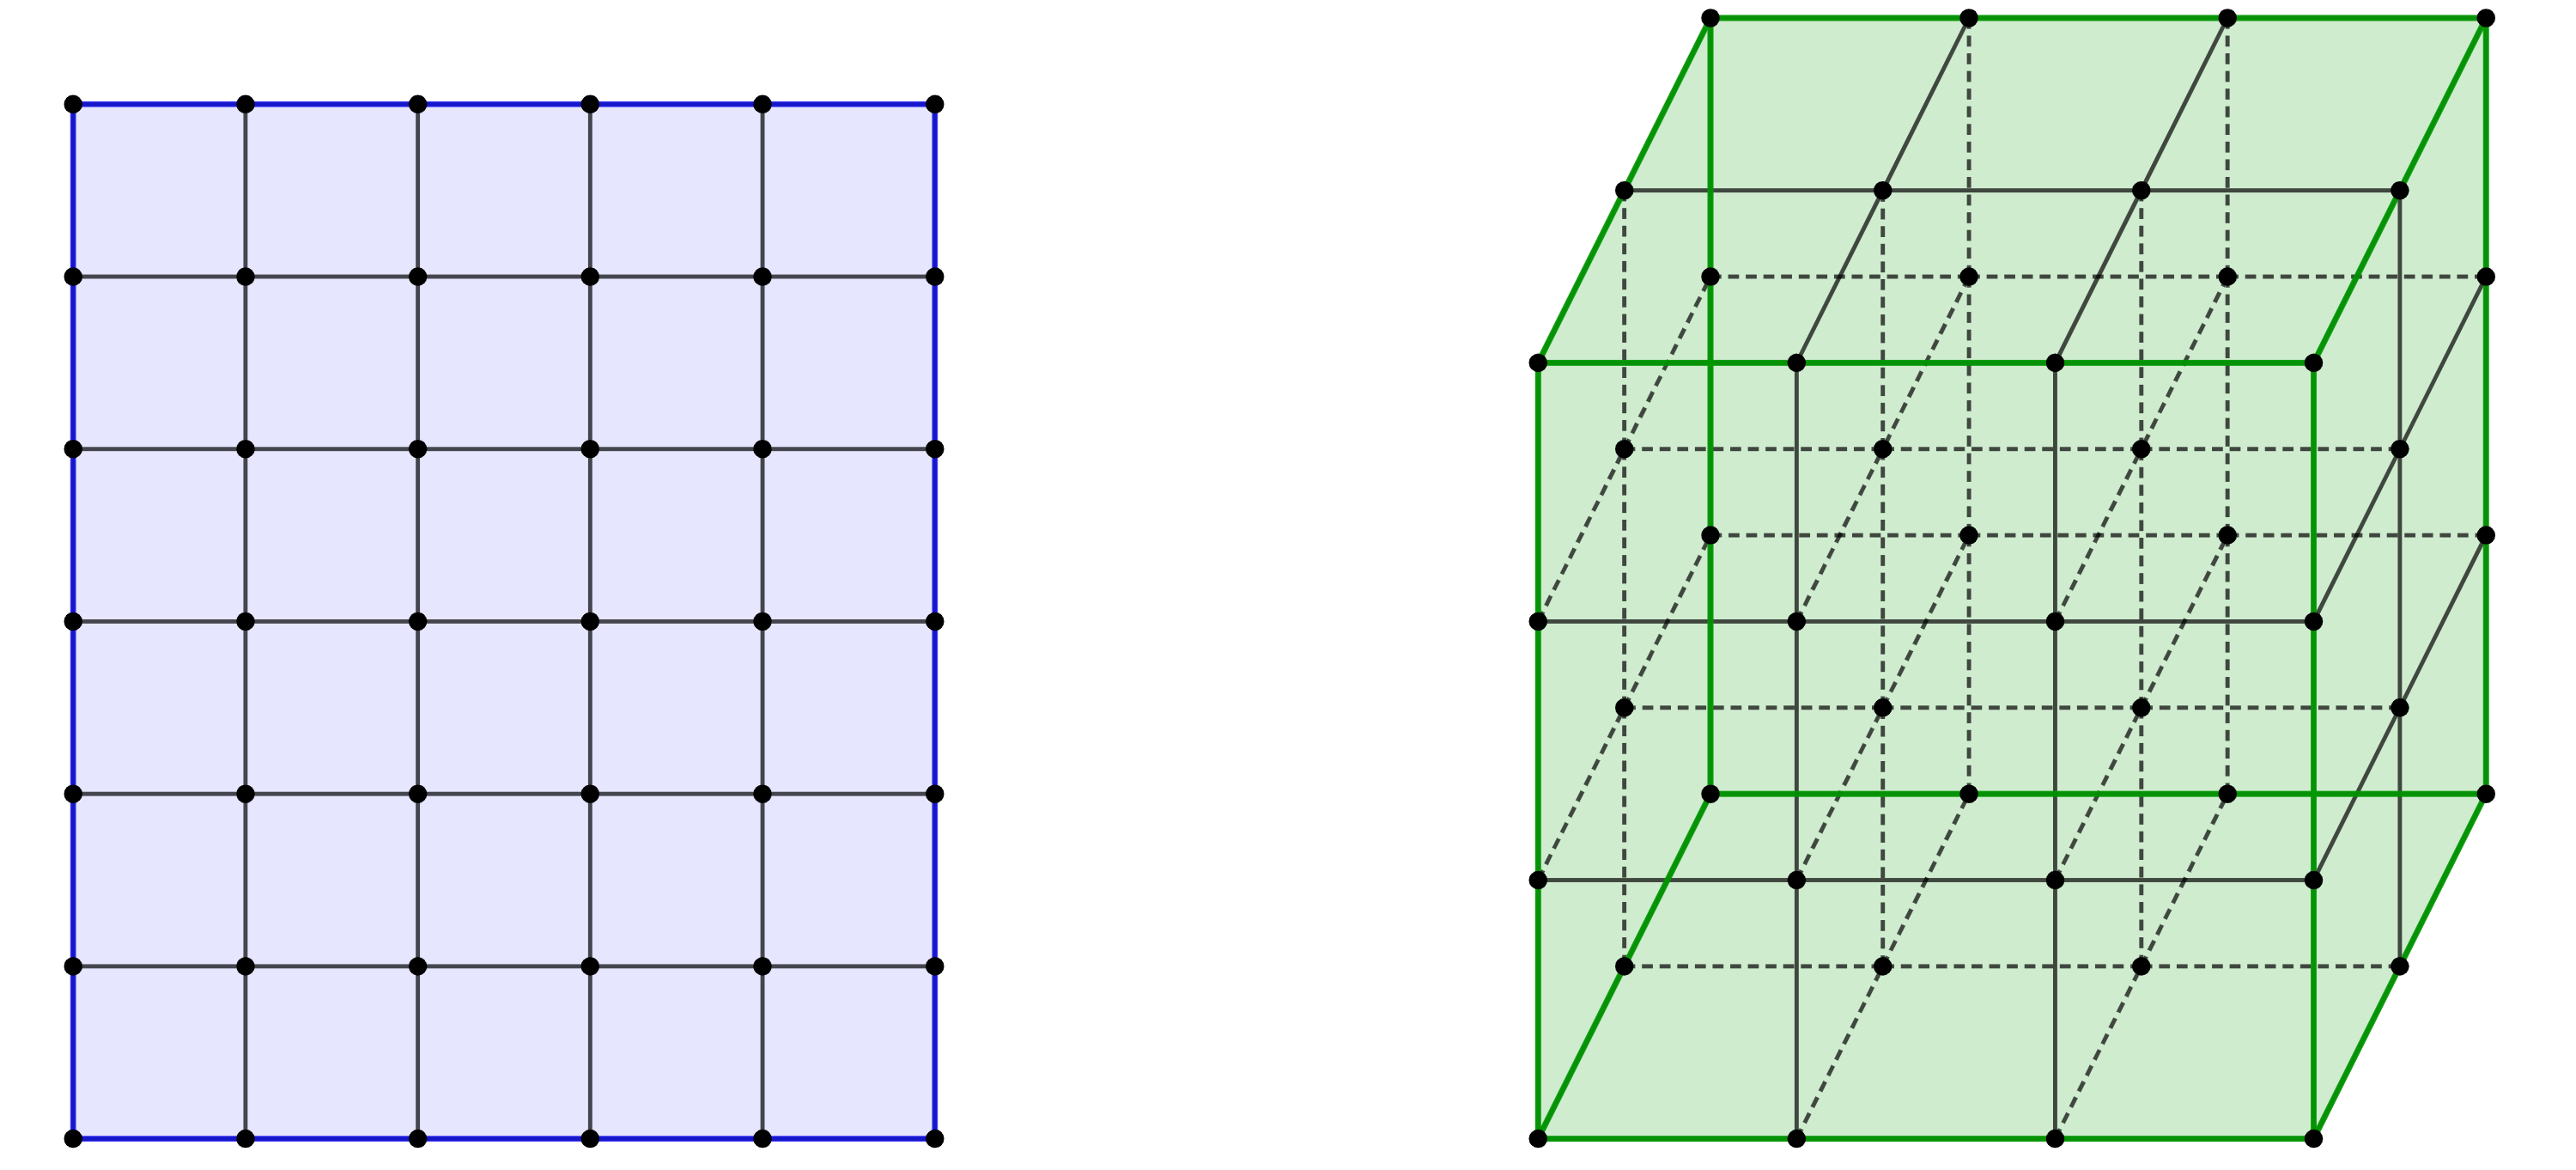

&nbsp;

> #### **Aproximació de les derivades**
>
> Si considerem ara la funció $g:\Omega \subset \mathbb{R}^n \rightarrow \mathbb{R}$ i volem calcular el seu Laplacià, podem utilitzar l'aproximació de la segona derivada que hem vist anteriorment:
>
> $$\Delta g(\boldsymbol{x}) = \sum_{i=1}^n \frac{\partial^2 g(\boldsymbol{x})}{\partial x_i^2} = \sum_{i=1}^n \frac{g(\boldsymbol{x} + h \boldsymbol{e}_i)- 2g(\boldsymbol{x}) + g(\boldsymbol{x} - h\boldsymbol{e}_i)}{h^2} + \mathcal{O}(h^2)$$
>
> on $\boldsymbol{e}_i$ amb $i=1,\ldots,n$ són els vectors de la base canònica.
>
> &nbsp;
>

&nbsp;

> #### **El cas 2D**
>
> Fent servir l'aproximació numèrica de les derivades vista anteriorment podem aproximar $\Delta u(x_i,y_j)$ de la següent manera:
>
> $$\Delta u(x_i,y_j) \approx \frac{u(x_{i+1},y_{j})+u(x_{i-1},y_{j})+u(x_{i},y_{j+1})+u(x_{i},y_{j-1})- 4u(x_i,y_j)}{h^2}.$$
>
> Així, considerant l'aproximació $u_{i,j} \approx u(x_i,y_j)$ i definint $F_{i,j} = F(x_i,y_j)$ tenim que l'equació a resoldre és:
>
> $$\frac{u_{i+1,j} + u_{i-1,j} + u_{i,j+1}+u_{i,j-1}-4u_{i,j}}{h^2} = -F_{i,j}.$$
>
> o, anàlogament, el sistema lineal que tenim és:
>
> $$u_{i+1,j} + u_{i-1,j} + u_{i,j+1}+u_{i,j-1}-4u_{i,j} = -h^2F_{i,j}$$
>
> on les $u_{i,j}$ són les incògnites a determinar.
>
> &nbsp;
>
> ⚠️ Notem que, igual que pel cas 1D, haurem d'imposar els nodes de la frontera.
>
> &nbsp;
>
> **Resolució mitjançant el mètode de Jacobi:**
>
> En el cas del mètode de Jacobi, per cada node interior $(x_i,y_j)$ tenim:
>
> $$ u_{i,j}^{(k+1)} = \frac{u_{i+1,j}^{(k)} + u_{i-1,j}^{(k)} + u_{i,j+1}^{(k)} + u_{i,j-1}^{(k)} + h^2F_{i,j}}{4}$$
>
> &nbsp;

&nbsp;

> #### **El cas 3D**
>
> Fent servir l'aproximació numèrica de les derivades vista anteriorment podem aproximar $\Delta u(x_i,y_j,z_k)$ de la següent manera:
>
> $$\begin{aligned}\Delta u(x_i,y_j,z_k) \approx& \frac{1}{h^2}\Big(u(x_{i+1},y_{j},z_k)+u(x_{i-1},y_{j},z_k)+u(x_{i},y_{j+1},z_k)+u(x_{i},y_{j-1},z_k) \\&\quad+ u(x_i,y_j,z_{k+1}) + u(x_i,y_j,z_{k-1})- 6u(x_i,y_j,z_k)\Big).\end{aligned}$$
>
> Així, considerant l'aproximació $u_{i,j,k} \approx u(x_i,y_j,z_k)$ i definint $F_{i,j,k} = F(x_i,y_j,z_k)$ tenim que l'equació a resoldre és:
>
> $$\frac{u_{i+1,j,k} + u_{i-1,j,k} + u_{i,j+1,k}+u_{i,j-1,k}+ u_{i,j,k+1}+u_{i,j,k-1}-6u_{i,j,k}}{h^2} = -F_{i,j,k}.$$
>
> o, anàlogament, el sistema lineal que tenim és:
>
> $$u_{i+1,j,k} + u_{i-1,j,k} + u_{i,j+1,k}+u_{i,j-1,k}+ u_{i,j,k+1}+u_{i,j,k-1}-6u_{i,j,k} = -h^2F_{i,j,k}$$
>
> on les $u_{i,j,k}$ són les incògnites a determinar.
>
> &nbsp;
>
> ⚠️ Notem que, igual que pel cas 1D, haurem d'imposar els nodes de la frontera.
>
> &nbsp;
>
> **Resolució mitjançant el mètode de Jacobi:**
>
> En el cas del mètode de Jacobi, per cada node interior $(x_i,y_j,z_k)$ tenim:
>
> $$ u_{i,j,k}^{(l+1)} = \frac{u_{i+1,j,k}^{(l)} + u_{i-1,j,k}^{(l)} + u_{i,j+1,k}^{(l)} + u_{i,j-1,k}^{(l)} + u_{i,j,k+1}^{(l)} + u_{i,j,k-1}^{(l)}+ h^2F_{i,j,k}}{6}$$
>
> &nbsp;

&nbsp;

#### Exemple 1: La importància de la vectorització

Considerem el domini $\Omega = [0,6]\times[0,5]\subset\mathbb{R}^2$, que es mostra a la figura de l'esquerra:

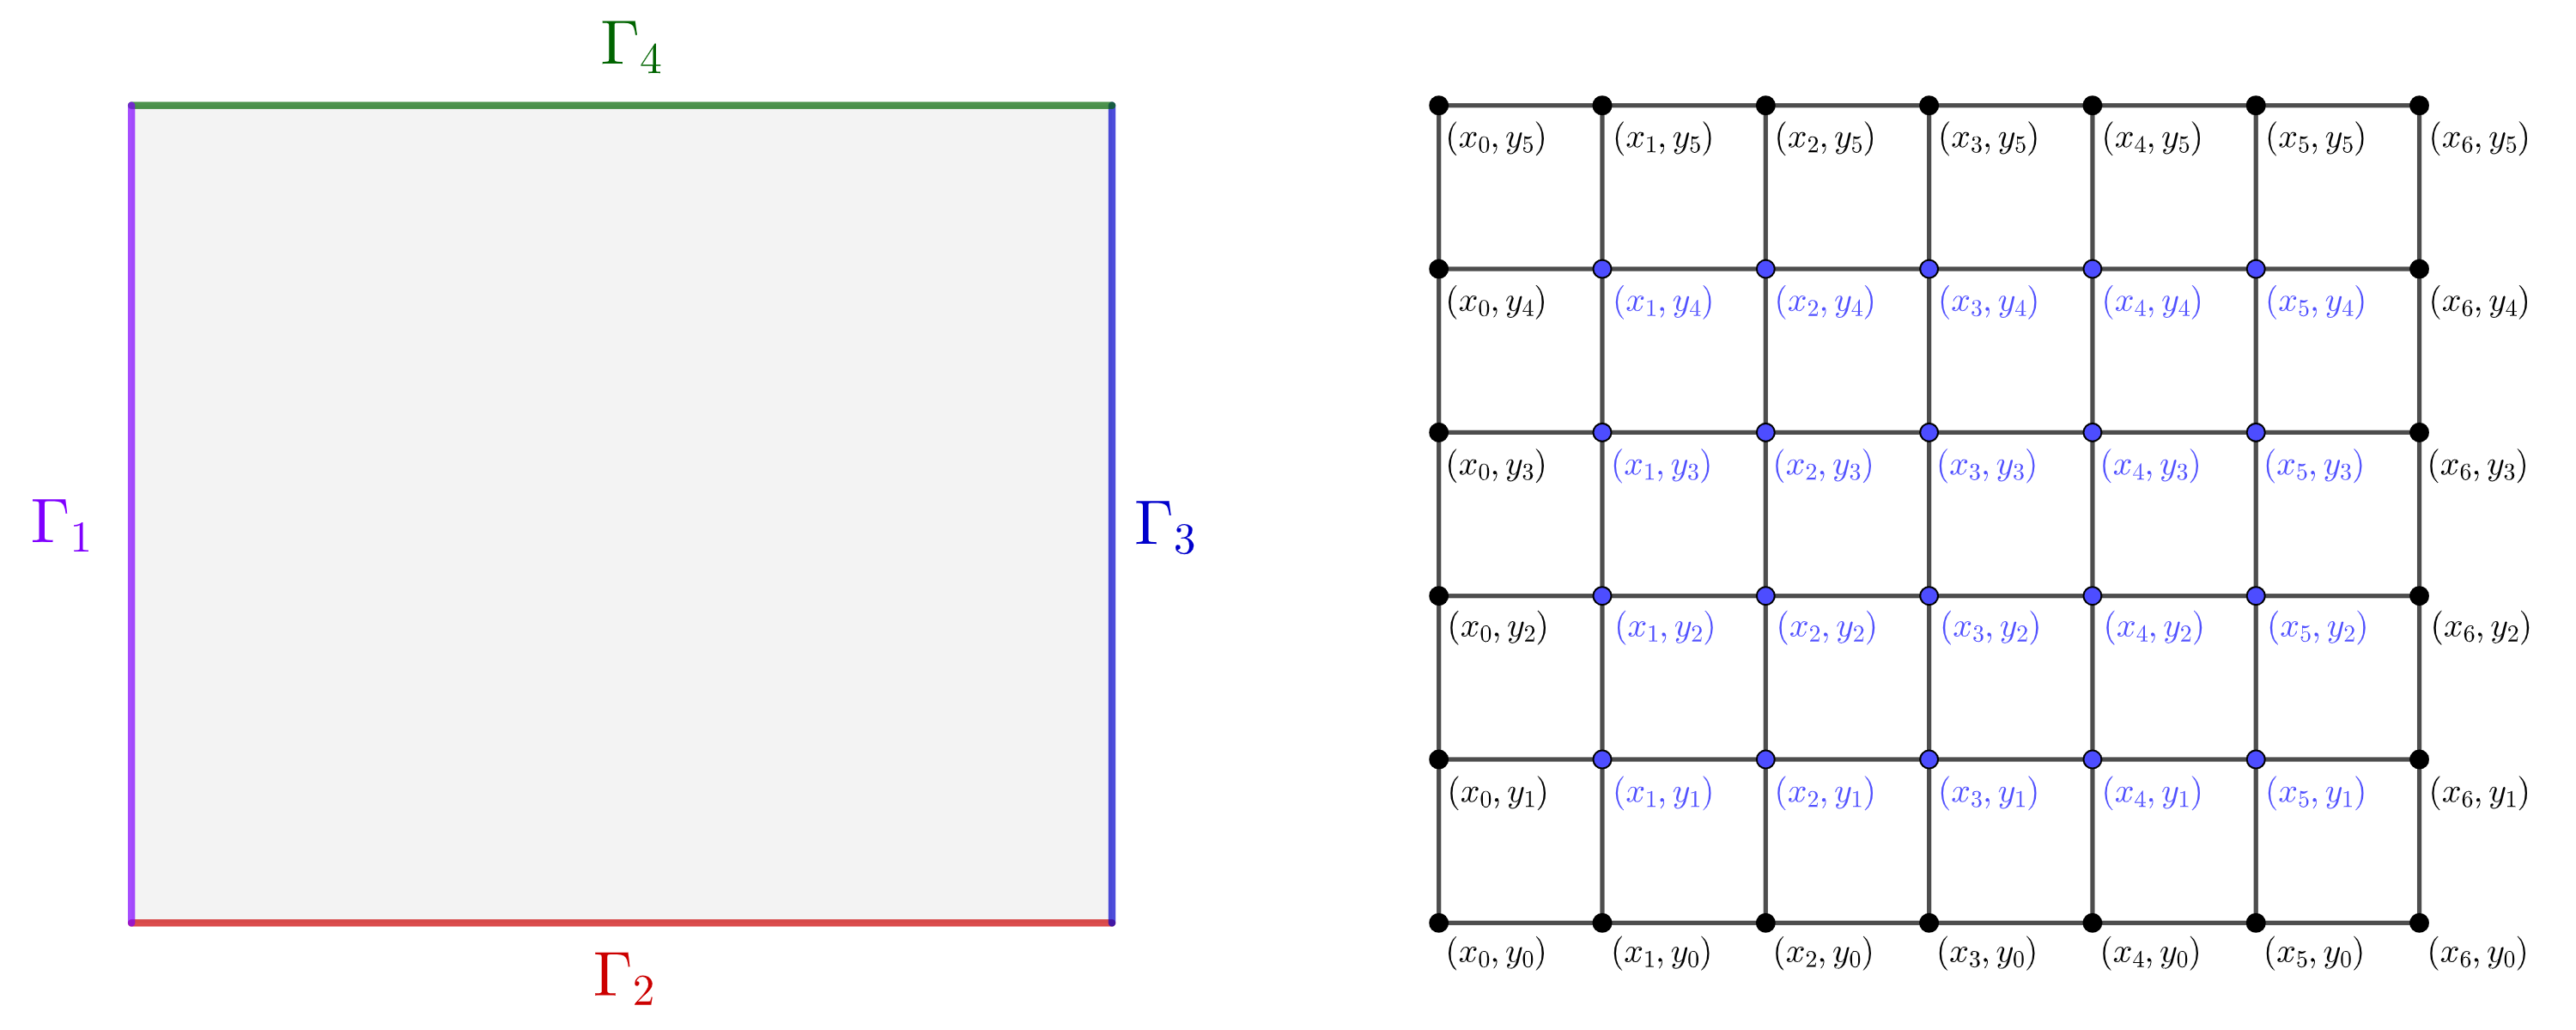

I suposem que volem resoldre el problema:

$$
\left\{
    \begin{aligned}
    &\Delta u(x,y) = 0,\quad \forall (x,y) \in \Omega\\
    & u(x,y) = 15,\,\,\forall(x,y)\in\Gamma_1\\
    & u(x,y) = 19,\,\,\forall(x,y)\in\Gamma_2\\
    & u(x,y) = 25,\,\,\forall(x,y)\in\Gamma_3\\
    & u(x,y) = 10,\,\,\forall(x,y)\in\Gamma_4\\
    \end{aligned}
\right.    
$$

emprant el mallat de la dreta de la imatge.

>⚠️ **Atenció!**
>
>Observem que hi ha punts que viuen en la intersecció de dues fronteres, en aquest prendrem el promig de les dues condicions, així, per exemple, al punt $(0,0)$ prendrem:
>
> $u_{0,0} = \cfrac{15+19}{2} = 17$

**Observació:** moltes vegades aquest tipus de punts no juguen cap paper per calcular la solució en els nodes interiors.

&nbsp;

**Resolució:** Mètode de Jacobi

Així, anirem iterant:
$$ u_{i,j}^{(k+1)} = \frac{u_{i+1,j}^{(k)} + u_{i-1,j}^{(k)} + u_{i,j+1}^{(k)} + u_{i,j-1}^{(k)}}{4},\quad \forall i = 1,\ldots,5,\,j = 1,\ldots,4$$

Prenent com a valor inicial $u^{(0)}_{i,j} =17.5$.

In [ ]:
## Importem les llibreries:
import numpy as np
import matplotlib.pyplot as plt
import time


## Domini: Omega = [a,b]x[c,d] = [0,6]x[0,5]
a,b = 0, 6 # Interval [a,b]
c,d = 0, 5 # Interval [c,d]
N, M = 6, 5 # Valors de N i M per cada interval


## Inicialitzem la matriu u, on guardarem la solució:
u = 17.5*np.ones((N+1,M+1))

# Imposem les condicions de frontera:
u[0,:] = 15  # Frontera 1
u[:,0] = 19  # Frontera 2
u[-1,:] = 25 # Frontera 3
u[:,-1] = 10 # Frontera 4

u[0,0] = (15+20)/2 # Punt intersecció de 1 i 2
u[-1,0] = (19+25)/2 # Punt intersecció de 2 i 3
u[-1,-1] = (25+19)/2 # Punt intersecció de 3 i 4
u[0,-1] = (10+15)/2 # Punt intersecció de 4 i 1


u0 = u.copy()

# Fem 10000 iteracions del mètode:
inici = time.time() # Temps inicial:

for k in range(10000):
    for i in range(1,N):
        for j in range(1,M):
            u[i,j] = (u0[i+1,j]+u0[i-1,j]+u0[i,j+1]+u0[i,j-1])/4

    u0 = u.copy()

fi = time.time() # Temps final:
temps_total = fi - inici # Temps total:
print(f"Temps total: {temps_total:.6f} segons") # Printem el temps necessari:

De la mateixa manera que pel cas 1D, és interessant vectoritzar les operacions. Al ser un mallat petit ara no hi haurà gaire diferència, però quan treballem amb mallats grans serà de gran importància:

In [ ]:
## Importem les llibreries:
import numpy as np
import matplotlib.pyplot as plt
import time


## Domini: Omega = [a,b]x[c,d] = [0,6]x[0,5]
a,b = 0, 6 # Interval [a,b]
c,d = 0, 5 # Interval [c,d]
N, M = 6, 5 # Valors de N i M per cada interval


## Inicialitzem la matriu u, on guardarem la solució:
u = 17.5*np.ones((N+1,M+1))

# Imposem les condicions de frontera:
u[0,:] = 15  # Frontera 1
u[:,0] = 19  # Frontera 2
u[-1,:] = 25 # Frontera 3
u[:,-1] = 10 # Frontera 4

u[0,0] = (15+20)/2 # Punt intersecció de 1 i 2
u[-1,0] = (19+25)/2 # Punt intersecció de 2 i 3
u[-1,-1] = (25+19)/2 # Punt intersecció de 3 i 4
u[0,-1] = (10+15)/2 # Punt intersecció de 4 i 1


# Fem 10000 iteracions del mètode:
inici = time.time() # Temps inicial:

for k in range(10000):
    u[1:-1,1:-1] = (u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2])/4 # Operació vectoritzada


fi = time.time() # Temps final:
temps_total = fi - inici # Temps total:
print(f"Temps total: {temps_total:.6f} segons") # Printem el temps necessari:

Si intentem dibuixar la solució, veurem que no és gaire bona, ja que el mallat que estem utilitzant és molt groller (i.e. té pocs punts).

Per solucionar-ho considerem el mateix exemple, però ara fent servir un mallat equiespait més, en particular considerarem un mallat de $(N+1)\times(M+1)$ punts amb $N=150$ i $N=125$. Fixem-nos que en aquest cas, tenim:

$$
h = \frac{b-a}{N} =\frac{6-0}{150} = \frac{d-c}{M} = \frac{5-0}{125} = \frac{1}{25} = 0.04,
$$

així, els punts del nostre mallat on resoldrem el problema són:

$$
(x_i,y_j) = \left(0.04i,0.04j\right),\,\,\, \forall i = 0,1,\ldots,150,\,\,\forall j =0,1,\ldots,125.
$$

&nbsp;

El resultat que obtenim treballant amb aquest mallat és el següent:

In [ ]:
## Importem les llibreries:
import numpy as np
import matplotlib.pyplot as plt
import time


## Domini: Omega = [a,b]x[c,d] = [0,6]x[0,5]
a,b = 0, 6 # Interval [a,b]
c,d = 0, 5 # Interval [c,d]
N, M = 150, 125 # Valors de N i M per cada interval


## Inicialitzem la matriu u, on guardarem la solució:
u = 17.5*np.ones((N+1,M+1))

# Imposem les condicions de frontera:
u[0,:] = 15  # Frontera 1
u[:,0] = 19  # Frontera 2
u[-1,:] = 25 # Frontera 3
u[:,-1] = 10 # Frontera 4

u[0,0] = (15+20)/2 # Punt intersecció de 1 i 2
u[-1,0] = (19+25)/2 # Punt intersecció de 2 i 3
u[-1,-1] = (25+19)/2 # Punt intersecció de 3 i 4
u[0,-1] = (10+15)/2 # Punt intersecció de 4 i 1


# Fem 30000 iteracions del mètode:
inici = time.time() # Temps inicial

for k in range(30000):
    u[1:-1,1:-1] = (u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2] )/4 # Operació vectoritzada


fi = time.time() # Temps final
temps_total = fi - inici # Temps total
print(f"Temps total: {temps_total:.6f} segons") # Printem el temps necessari


## Dibuixem el resultat amb un mallat més fi:

# Generem la malla de punts on dibuixarem la solució:
X = np.linspace(a,b, num=N+1)
Y = np.linspace(c,d, num=M+1)
X, Y = np.meshgrid(X, Y)

# Creem la figura:
fig, ax = plt.subplots(figsize=(8, 5))

# Mapa de colors:
plot = ax.pcolor(X, Y, u.T, cmap='RdBu_r')

# Corbes de Nivell:
cset = ax.contour(X, Y, u.T, cmap='gray')
plt.clabel(cset, inline=True)

# Ajustem la relació x i y perque sigui a escala
ax.set_aspect('equal', adjustable='box')

# Afegim la barra de colors
plt.colorbar(plot)

# Dibuixem el resultat:
plt.show()

&nbsp;

#### Exemple 2: Un exemple una mica més avançat:

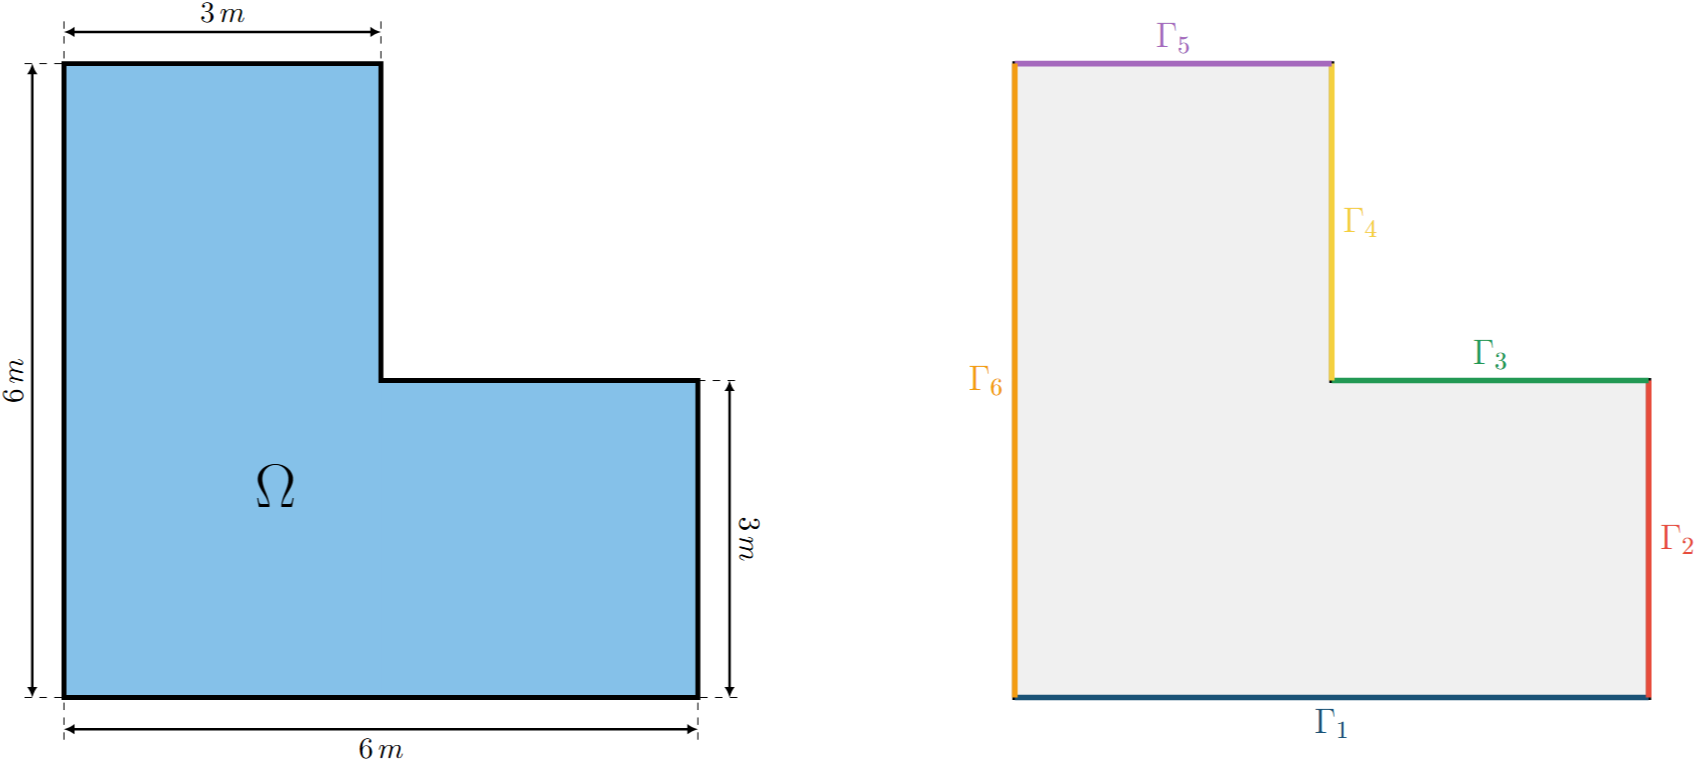

Considerem el domini descrit per la Figura de l'esquerra, sobre el qual tenim el següent problema:

$$
\left\{
    \begin{aligned}
    &\Delta u(x,y) = 0,\quad \forall (x,y) \in \Omega\\
    & u(x,y) = 15,\,\,\forall(x,y)\in\Gamma_1\cup\Gamma_3\cup\Gamma_5\\
    & u(x,y) = 10,\,\,\forall(x,y)\in\Gamma_2\cup\Gamma_4\cup\Gamma_6\\
    \end{aligned}
\right.    
$$

Per fer-ho considerarem un mallat equiespaiat amb $h=0.1\,m$ i, per tant $N=M=60$. Així, definirem el mallat $(N+1)\times(M+1)$ següent:



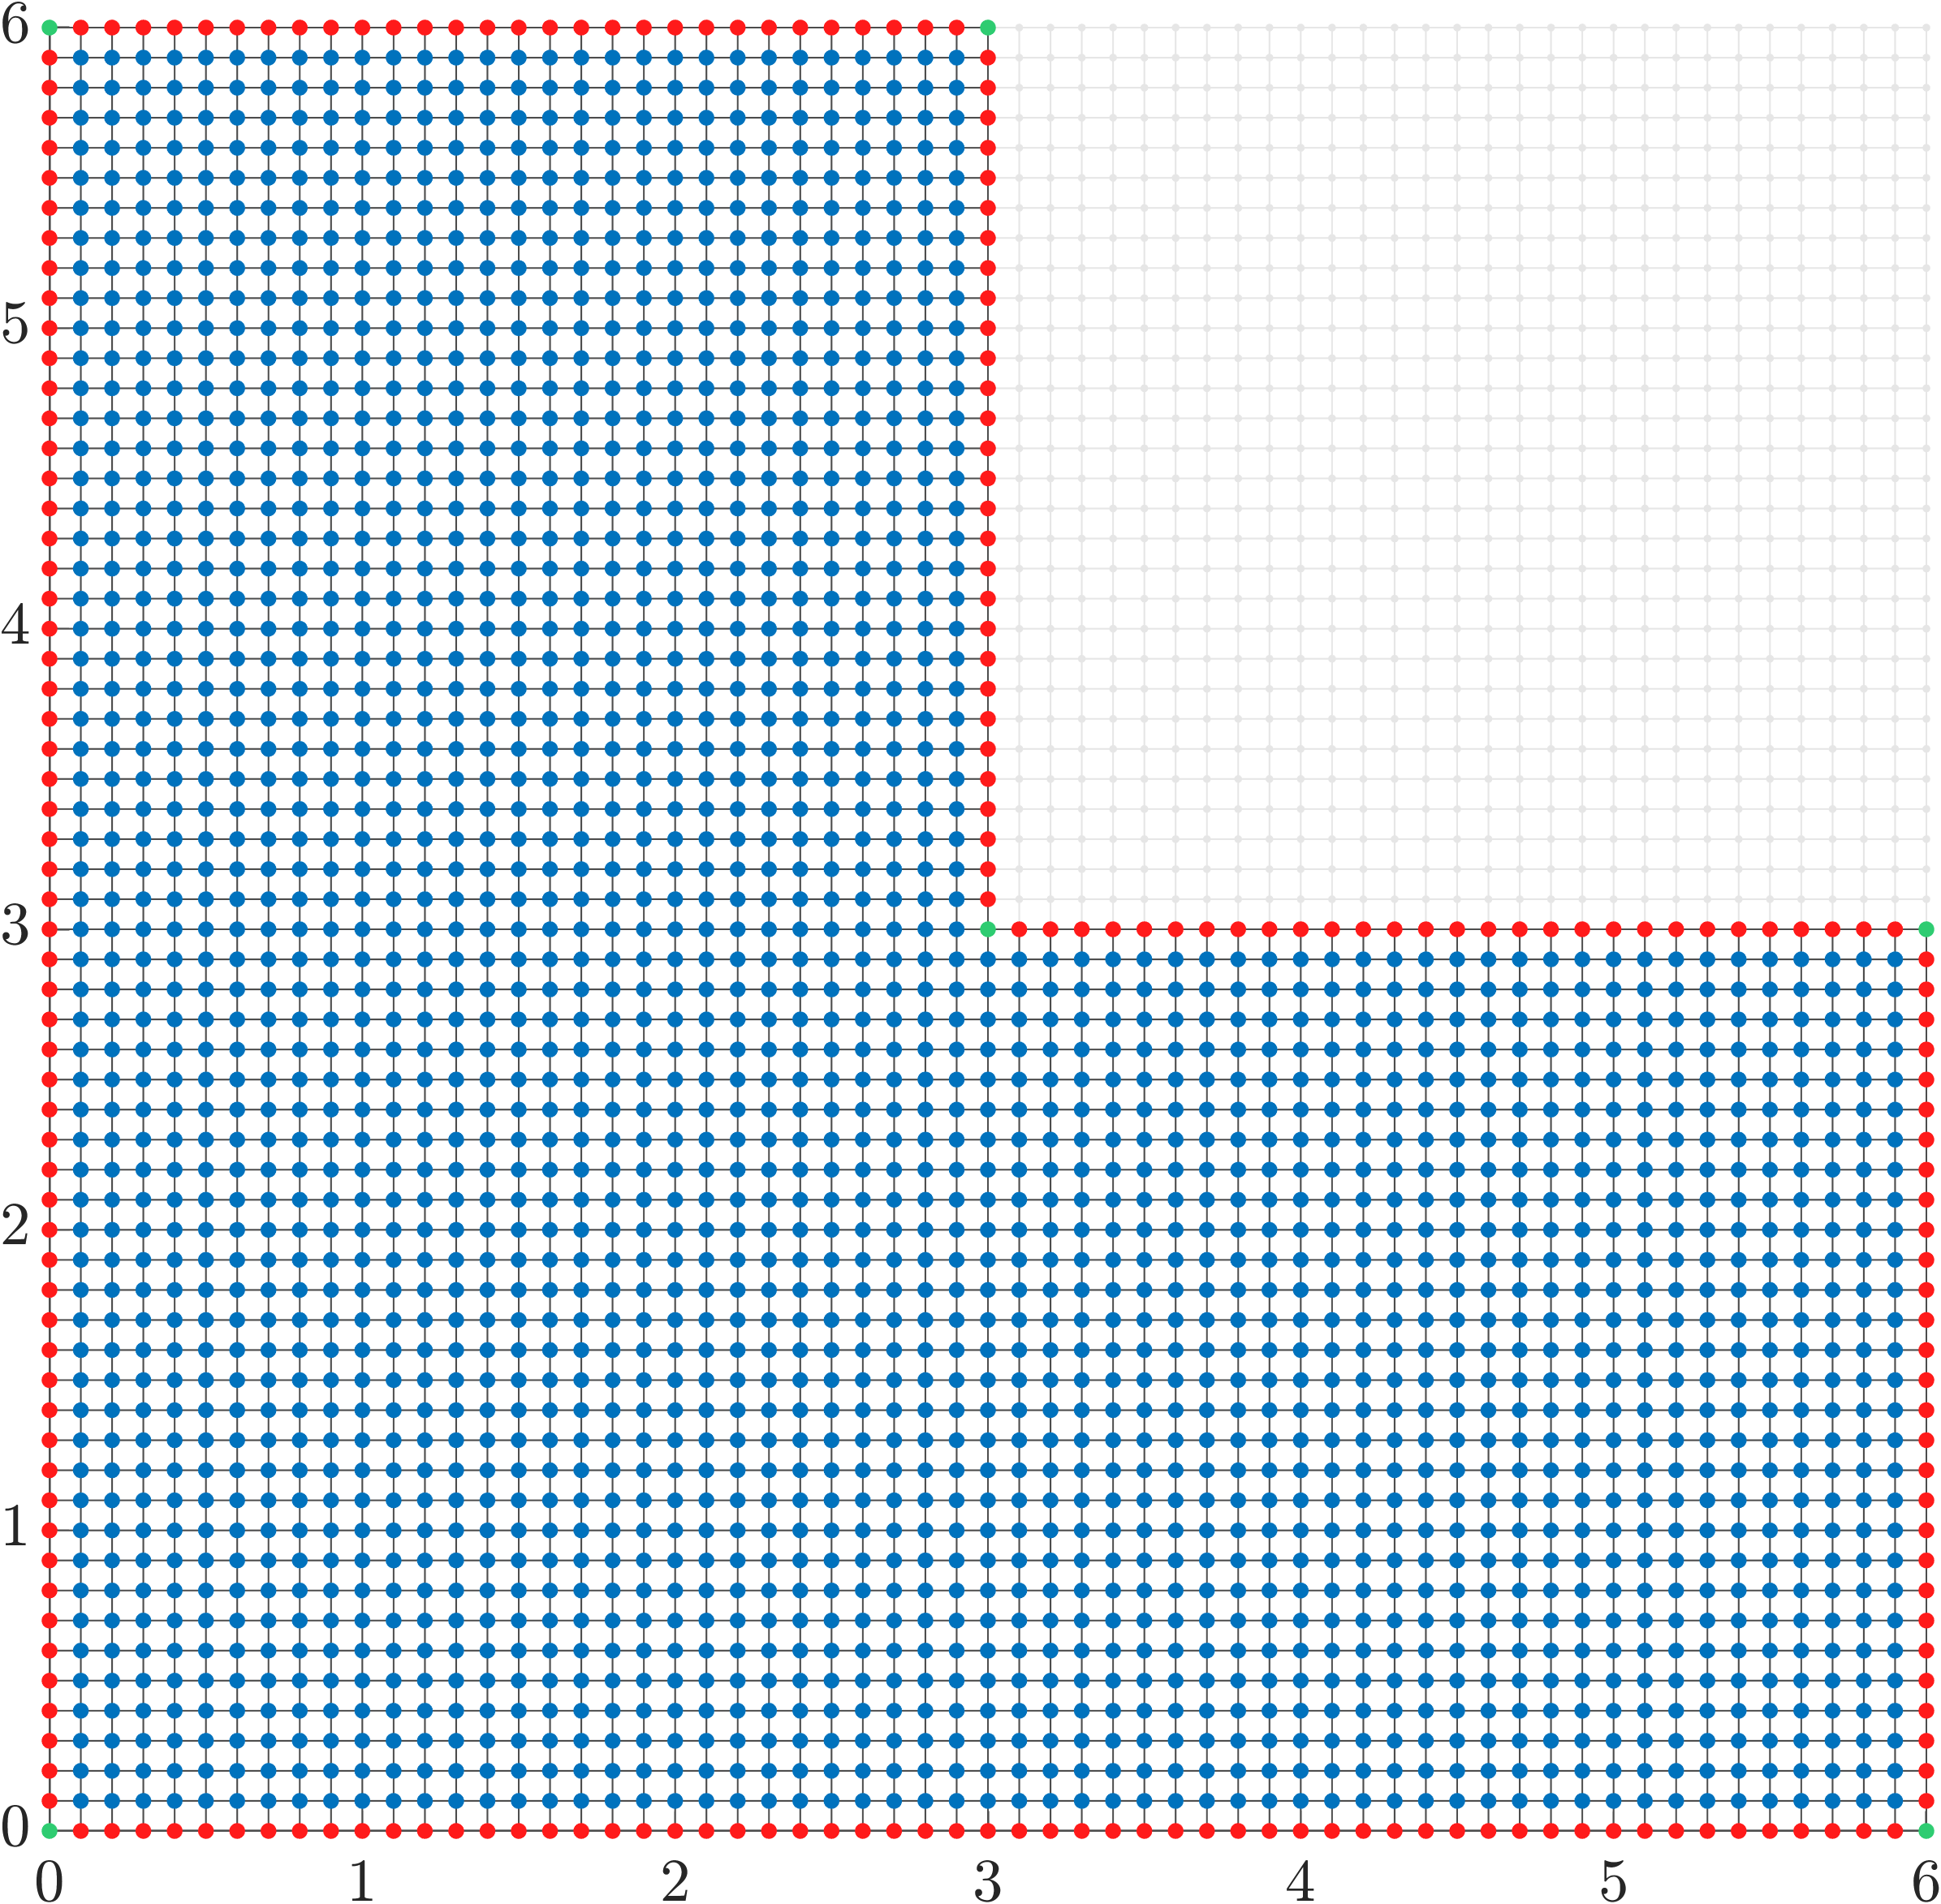

Notem que:

*   Els nodes vermells són els nodes que pertanyen a la frontera.

*   Els nodes verds també pertanyen a la frontera, però en aquest cas són intersecció de dues fronteres.

* Els nodes en blau són els nodes on volem determinar la solució $u_{ij}$.

* Els nodes en gris no formen part del domini.



&nbsp;

Notem que als nodes en verd hauríem d'imposar el valor mitjà entre les dues fronteres que tenen en comú. Ara bé, com els nodes blaus només depenen dels nodes adjacents ens podem adonar que l'únic node verd del qual cal calcular la seva solució el que pertany a les fronteres 3 i 4, i.e. $u_{30,30}$.

##### **Resolució del sistema: opció 1**

Per tal de resoldre el sistema, podríem procedir igual que a l'exemple anterior, és a dir fent a cada iteració:
```python
u[1:-1,1:-1] = (u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2])/4
```

Ara bé, això té dos problemes:

*   Estem reescrivint valors on la solució ja està fixe (la de les fronteres $\Gamma_3$ i $\Gamma_4$).

*   Estem calculant la solució a nodes que no ens interessen.

&nbsp;

El segon problema, no ho és, ja que podríem ignorar la solució a aquells nodes, però pel que fa al primer, sí que tindrem un problema...

**Solució:** Tornem a imposar la frontera que hem canviat a cada iteració, és a dir, per cada iteració farem:

```python
u[1:-1,1:-1] = (u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2])/4

# Tornem a imposar:
u[31:-1,30] = 15  # Imposem de nou la frontera 3
u[30,:31:-1] = 10 # Imposem de nou la frontera 4
u[30,30] = 12.5   # Imposem de nou la intersecció de les fronteres 3 i 4
```

&nbsp;

El codi que fa aquest procediment (30000 iteracions) és:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time


## Domini: Omega = [a,b]x[c,d] = [0,6]x[0,5]
a,b = 0, 6 # Interval [a,b]
c,d = 0, 6 # Interval [c,d]
N, M = 60, 60 # Valors de N i M per cada interval


## Inicialitzem la matriu u, on guardarem la solució:
u = 12.5*np.ones((N+1,M+1))

# Imposem les condicions de frontera, no imposo els punts de la intersecció:
u[1:-1,0] = 15  # Frontera 1
u[-1,1:30] = 10  # Frontera 2
u[31:-1,30] = 15# Frontera 3
u[30,:31:-1] = 10# Frontera 4
u[1:30,-1] = 15 # Frontera 5
u[0,1:-1] = 10 # Frontera 6

# Nomes cal imposar la intersecció de les fronteres 3 i 4, les altres no s'utilitzen:
u[30,30] = 12.5


# Fem 30000 iteracions del mètode:
inici = time.time() # Temps inicial

for k in range(30000):
    u[1:-1,1:-1] = (u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2] )/4 # Operació vectoritzada

    # AL fer això hem reescrit les fronteres 3 i 4, les tornem a imposar:
    u[31:-1,30] = 15  # Imposem de nou la frontera 3
    u[30,:31:-1] = 10 # Imposem de nou la frontera 4
    u[30,30] = 12.5   # Imposem de nou la intersecció de les fronteres 3 i 4


fi = time.time() # Temps final
temps_total = fi - inici # Temps total
print(f"Temps total: {temps_total:.6f} segons") # Printem el temps necessari


# Un cop acabat el procediment, fem nan sobre la solució dels nodes que estan fora del domini:
u[31:,31:] = np.nan

## Dibuixem el resultat amb un mallat més fi:

# Generem la malla de punts on dibuixarem la solució:
X = np.linspace(a,b, num=N+1)
Y = np.linspace(c,d, num=M+1)
X, Y = np.meshgrid(X, Y)

# Creem la figura:
fig, ax = plt.subplots(figsize=(5, 5))

# Mapa de colors:
plot = ax.pcolor(X, Y, u.T, cmap='RdBu_r')

# Corbes de Nivell:
cset = ax.contour(X, Y, u.T, cmap='gray')
plt.clabel(cset, inline=True)

# Ajustem la relació x i y perque sigui a escala
ax.set_aspect('equal', adjustable='box')

# Afegim la barra de colors
plt.colorbar(plot)

# Dibuixem el resultat:
plt.show()

##### **Resolució del sistema: Opció 2**

Una opció per evitar aquest problema és dividir cada iteració en dos blocs:

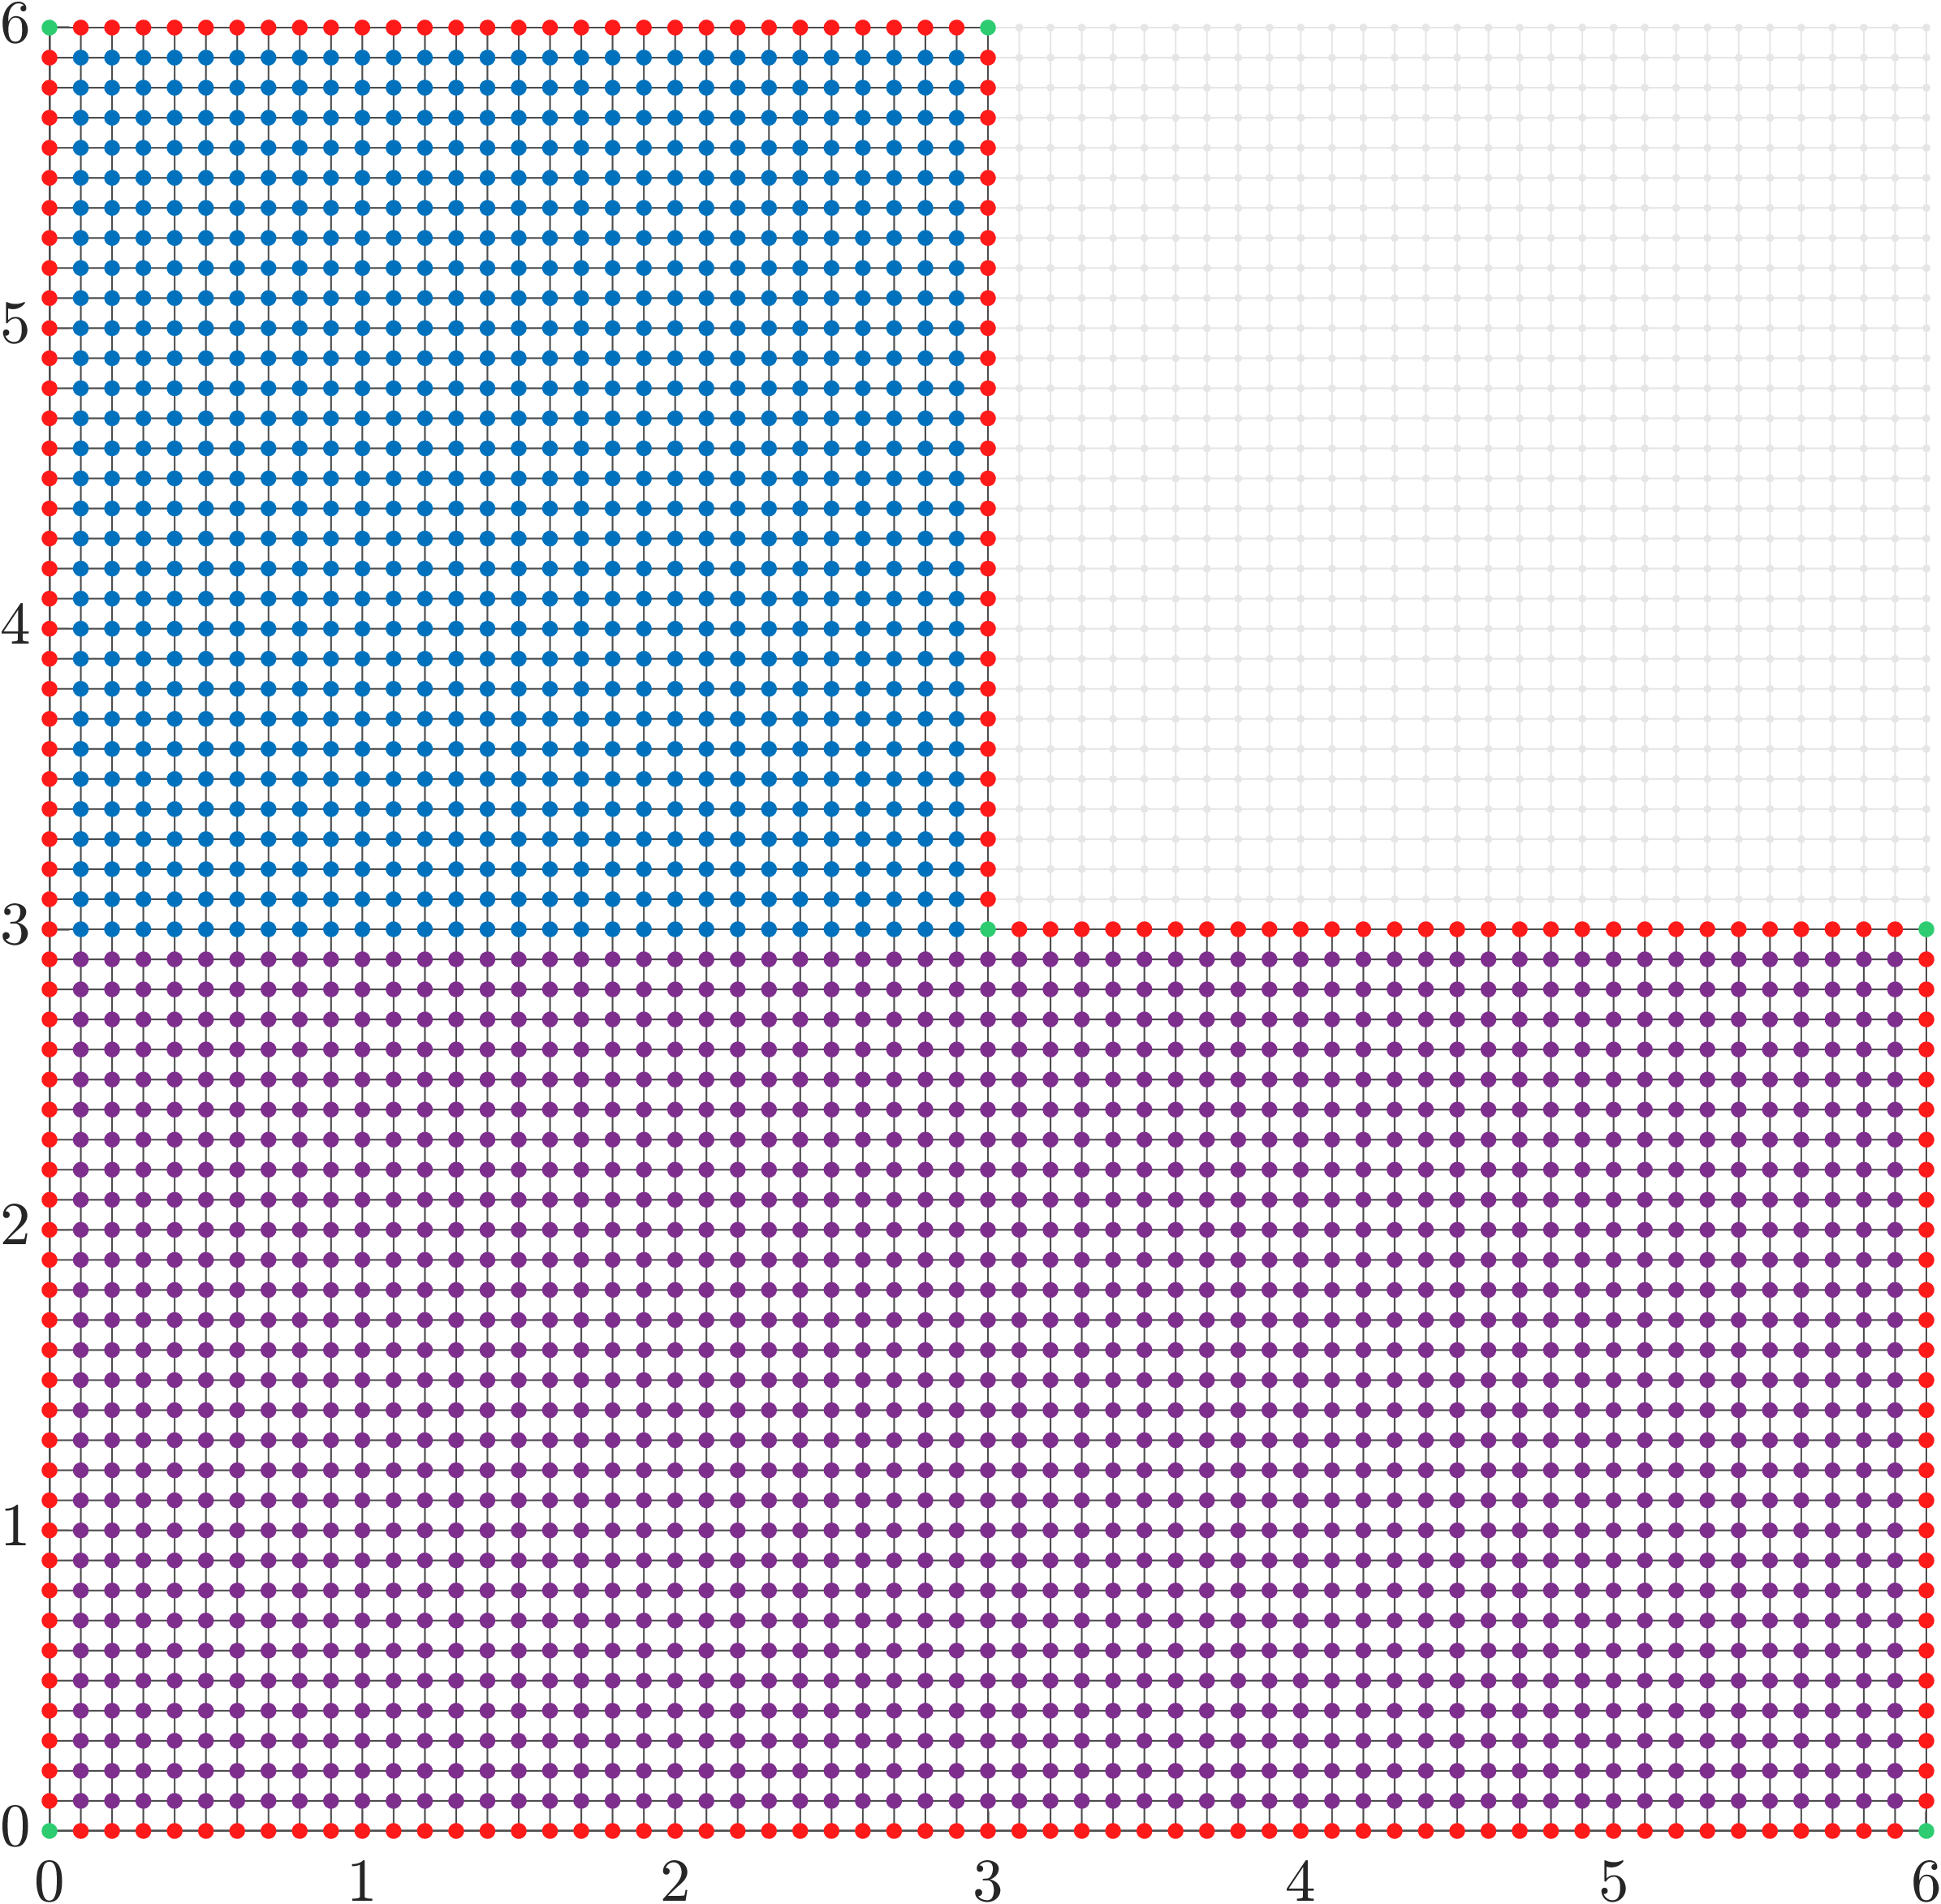

Així, per cada pas del mètode de Jacobi primer actualitzaríem la solució associada als nodes liles i, a continuació, faríem el mateix per la solució associada als nodes blaus.

&nbsp;

El codi que fa aquest procediment (30000 iteracions) es pot trobar a continuació. Notem que, tot i que, en aquest cas és més lent, a la pràctica és millor, ja que ens permetrà controlar l'error de manera més senzilla:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time


## Domini: Omega = [a,b]x[c,d] = [0,6]x[0,5]
a,b = 0, 6 # Interval [a,b]
c,d = 0, 6 # Interval [c,d]
N, M = 60, 60 # Valors de N i M per cada interval


## Inicialitzem la matriu u, on guardarem la solució:
u = 12.5*np.ones((N+1,M+1))

# Imposem les condicions de frontera, no imposo els punts de la intersecció:
u[1:-1,0] = 15  # Frontera 1
u[-1,1:30] = 10  # Frontera 2
u[31:-1,30] = 15# Frontera 3
u[30,:31:-1] = 10# Frontera 4
u[1:30,-1] = 15 # Frontera 5
u[0,1:-1] = 10 # Frontera 6

# Nomes cal imposar la intersecció de les fronteres 3 i 4, les altres no s'utilitzen:
u[30,30] = 12.5

u0 = u.copy()
# Fem 30000 iteracions del mètode:
inici = time.time() # Temps inicial

for k in range(30000):
    u[1:-1,1:30] = (u0[2:,1:30] + u0[:-2,1:30] + u0[1:-1,2:31] + u0[1:-1,:29])/4 # Primer bloc
    u[1:30,30:-1] = (u0[2:31,30:-1] + u0[:29,30:-1] + u0[1:30,31:] + u0[1:30,29:-2])/4 # Segon bloc

    u0 = u.copy()


fi = time.time() # Temps final
temps_total = fi - inici # Temps total
print(f"Temps total: {temps_total:.6f} segons") # Printem el temps necessari


# Un cop acabat el procediment, fem nan sobre la solució dels nodes que estan fora del domini:
u[31:,31:] = np.nan

## Dibuixem el resultat amb un mallat més fi:

# Generem la malla de punts on dibuixarem la solució:
X = np.linspace(a,b, num=N+1)
Y = np.linspace(c,d, num=M+1)
X, Y = np.meshgrid(X, Y)

# Creem la figura:
fig, ax = plt.subplots(figsize=(5, 5))

# Mapa de colors:
plot = ax.pcolor(X, Y, u.T, cmap='RdBu_r')

# Corbes de Nivell:
cset = ax.contour(X, Y, u.T, cmap='gray')
plt.clabel(cset, inline=True)

# Ajustem la relació x i y perque sigui a escala
ax.set_aspect('equal', adjustable='box')

# Afegim la barra de colors
plt.colorbar(plot)

# Dibuixem el resultat:
plt.show()

&nbsp;

&nbsp;

# Enunciat pràctica:

### **Exercici 0:**

Considera el sistema lineal $A\boldsymbol{x} = \boldsymbol{b}$ de dimensions $8\times8$ donat per:

$$
A =
\begin{pmatrix}
2 & -1 & 0 & 0 & 0 & 0 & 0 & 0\\
-1 & 2 & -1 & 0 & 0 & 0 & 0 & 0\\
0 & -1 & 2 & -1 & 0 & 0 & 0 & 0\\
0 & 0 & -1 & 2 & -1 & 0 & 0 & 0\\
0 & 0 & 0 & -1 & 2 & -1 & 0 & 0\\
0 & 0 & 0 & 0 & -1 & 2 & -1 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & 2 & -1\\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 2 \\
\end{pmatrix},\qquad
\boldsymbol{b} = \begin{pmatrix}1\\1\\1\\1\\1\\1\\1\\1\\\end{pmatrix}.
$$

utilitzant els mètodes de Jacobi, Gauss-Seidel i $\omega$-relaxació successiva emprant com a condició inicial $\boldsymbol{x}^{(0)}=(1,1,1,1,1,1,1,1)^\top$ i toleràncies relatives i absolutes de $10^{-10}$.

Contesta:
*   Quantes iteracions cal fer si utilitzem el mètode de Jacobi?

*   Quantes iteracions cal fer si utilitzem el mètode de Gauss-Seidel?

*   Quin és el valor $\omega$ òptim (amb 3 xifres decimals) del mètode de $\omega$-relaxació successiva? Quantes iteracions es fan amb aquest mètode per aquest valor de $\omega$ que has trobat?



In [ ]:
### Espai per fer l'exercici 0
import numpy as np
from scipy.linalg import solve_triangular

def jacobi(A, b, x0, abstol=1.e-10, reltol=1.e-10, maxIter=100):
  n = A.shape[0]
  xk = x0.copy()
  for k in range(maxIter):
    xk1 = xk.copy()
    for i in range(n):
      suma = 0.
      for j in range(n):
        if i != j:
          suma += A[i, j] * xk[j]
      xk1[i] = (b[i] - suma) / A[i, i]
    if np.linalg.norm(xk1 - xk) < abstol or np.linalg.norm(xk1 - xk) / np.linalg.norm(xk1) < reltol:
      return xk1, k
    xk = xk1.copy()

  if np.linalg.norm(xk1 - xk) < abstol:
    return xk, -2
  elif np.linalg.norm(xk1 - xk) / np.linalg.norm(xk1) < reltol:
    return xk, -1
  else:
    return xk, -3

def gauss_seidel(A, b, x0, abstol=1.e-10, reltol=1.e-10, maxIter=100):
  n = A.shape[0]
  xk = x0.copy()
  k = 0
  for k in range(maxIter):
    xk1 = xk.copy()
    xk1[0] = (b[0] - np.dot(A[0, 1:], xk[1:])) / A[0, 0]
    for i in range(1, n-1):
      xk1[i] = (b[i] - np.dot(A[i, :i], xk1[:i]) - np.dot(A[i, i+1:], xk[i+1:])) / A[i, i]
    xk1[n-1] = (b[n-1] - np.dot(A[n-1, :n-1], xk1[:n-1])) / A[n-1, n-1]

    if np.linalg.norm(xk1 - xk) < abstol or np.linalg.norm(xk1 - xk) / np.linalg.norm(xk1) < reltol:
      return xk1, k
    xk = xk1.copy()

  if np.linalg.norm(xk1 - xk) < abstol:
    return xk, -2
  elif np.linalg.norm(xk1 - xk) / np.linalg.norm(xk1) < reltol:
    return xk, -1
  else:
    return xk, -3

def omega_relaxation(A, b, x0, omega, abstol=1e-10, reltol=1e-10, maxIter=100):
  n = A.shape[0]
  D = np.diag(np.diag(A))
  L = np.tril(A, k=-1)
  U = np.triu(A, k=1)

  xk = x0.copy()

  DomegaL = D + omega * L
  UomegaD = omega * U - (1 - omega) * D
  omegab = omega * b

  for k in range(maxIter):
    xk1 = solve_triangular(DomegaL, -UomegaD @ xk + omegab, lower=True)

    if np.linalg.norm(xk1 - xk) < abstol or np.linalg.norm(xk1 - xk) / np.linalg.norm(xk1) < reltol:
      return xk1, k
    xk = xk1.copy()

  if np.linalg.norm(xk1 - xk) < abstol:
    return xk, -2
  elif np.linalg.norm(xk1 - xk) / np.linalg.norm(xk1) < reltol:
    return xk, -1
  else:
    return xk, -3

def optimal_omega (A, b, x0):
  min_iter = float('inf')
  best_omega = 0
  for omega in np.linspace(0, 2, 2001):
    xk, iter = omega_relaxation(A, b, x0, omega)
    if iter < min_iter and iter > 0:
      min_iter = iter
      best_omega = omega
  return best_omega, min_iter


#definim la matriu i els vectors
n = 8
A = 2 * np.eye(n, n)- np.eye(n, n, k=1) - np.eye(n, n, k=-1)
b = np.ones(n)
x0 = np.ones(n)

xk_jac, iter_jac = jacobi(A, b, x0, maxIter=1000)
xk_gs, iter_gs = gauss_seidel(A, b, x0, maxIter=1000)
omega, min_iter = optimal_omega(A, b, x0)
xk_om, iter_om = omega_relaxation(A, b, x0, omega)

print(xk_jac, iter_jac)
print(xk_gs, iter_gs)
print(xk_om, iter_om)
print(omega, min_iter)


&nbsp;

### **Exercici 1:**

*Implementeu una funció que, donat els valor de l'interval $[a,b]$, els valors de la solució a la frontera $c_a$ i $c_b$, un valor de $N$, una funció $F$, un valor optatiu de la tolerància `tol` i un número màxim d'iteracions `maxIter`, resolgui l'equació estacionària 1D*

$$
\left\{
    \begin{aligned}
        &u_{xx}(x) = - F(x),\quad \text{ per } x\in[a,b]\\
        &u(a) = c_a,\\
        &u(b) = c_b.
    \end{aligned}
\right.    
$$

*utilitzant el mètode de Jacobi i les operacions vectoritzades de python.*

&nbsp;

*La funció ha de ser de l'estil:*

```
solEstEq1D(a, b, ca, cb, N, F, maxIter=1.e5, tol=1.e-10)
```

&nbsp;

*Tingues en compte les següents consideracions:*

* *`tol` ens indicarà la tolerància mínima amb la qual volem la solució utilitzant la norma del màxim: $\|\boldsymbol{u}^{(k+1)}-\boldsymbol{u}^{(k)}\|_\infty < \varepsilon$. Un cop assolida, el mètode ha de retornar la solució.*

* *Preneu $u_i^{(0)} = (c_a+c_b)/2$ per $i=1,\ldots,N-1$.*

* *El paràmetre* `F` *de la funció* `solEstEq1D` ha de ser una funció. (Podeu trobar un exemple més endavant)

&nbsp;

*A més, la funció ha de retornar la solució `x` obtinguda i el nombre d'iteracions realitzades. Si no s'ha assolit la tolerància en el nombre màxim d'iteracions el valor del nombre d'iteracions realitzades s'ha de retornar amb signe negatiu. Per tant, la funció retornarà sempre `u` solució i `niter` (nombre d'iteracions).*

In [ ]:
#### Espai per la implementació de l'exercici 1:
import numpy as np

def solEstEq1D(a, b, cA, cB, N, F, maxIter=1.e5, tol=1.e-10):
  h = (b-a)/N
  x = np.linspace(a, b, N+1)

  T = np.ones(N+1) * (cA+cB)/2
  T[0], T[N] = cA, cB

  for iter in range(int(maxIter)):
    T_old = T.copy()
    for i in range(1, N):
      T[i] = (T_old[i-1] + T_old[i+1] + h**2 * F(x[i]))/2
    max_diff = np.max(np.abs(T - T_old))
    if max_diff < tol:
      return T, iter

  return T, -1

*Et pot ser d'ajut la següent funció per dibuixar la solució:*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dibuixaSol1D(u,a,b,titol='Exemple'):
    # Nombre de punts:
    Nplus1 = u.shape[0]

    # Malla equiespaiada:
    x = np.linspace(a,b,Nplus1)

    # Obrim la Figura i dibuixem:
    plt.figure(figsize=(6, 5))

    # Plot:
    plt.plot(x, u, label="Solució", color="b", linewidth=2)

    # Eixos i llegenda
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.title(titol)
    plt.grid(True)
    plt.legend()

    # Mostrem el dibuix:
    plt.show()

*Exemple: resolem el següent problema amb $N=100$:*
$$
\left\{
\begin{aligned}
&\Delta u(x) = -x^2,\quad x\in[0,2]\\
&u(0) = 0\\
&u(2) = 1\\
\end{aligned}
\right.
$$

In [ ]:
# Exemple d'us de la funció que has creat:
import numpy as np

# Definim la funció:
def funcio(x):
    return x**2

# Definim els paràmetres del problema
N = 100
a,b = 0,2
ca,cb = 0,1

# Trobem la solució
u,niter = solEstEq1D(a, b, ca, cb, N, funcio)
dibuixaSol1D(u,a,b)

&nbsp;

*Aplica el codi anterior per resoldre el problema:*

$$
\left\{
    \begin{aligned}
        &\delta u(x) = - \sin^2(x),\quad \text{ per } x\in[0,2\pi]\\
        &u(0) = 0,\\
        &u(2\pi) = 1.
    \end{aligned}
\right.    
$$

&nbsp;

*Emprant* $N=100$. ***Quin és el valor aproximat de*** $u(\pi)$?


In [ ]:
#### Espai per fer l'aplicació de l'exercici 1:
import numpy as np

# Definim la funció:
def funcio(x):
    return  np.sin(x)**2

# Definim els paràmetres del problema
N = 100
a,b = 0, 2 * np.pi
ca,cb = 0,1

# Trobem la solució
u,niter = solEstEq1D(a, b, ca, cb, N, funcio)
dibuixaSol1D(u,a,b)
print(u[50])



**Et pot ser d'ajut:**

Podem passar una funció com a argument d'una funció:

In [ ]:
# Exemple:
import numpy as np

# Definim la funció
def funcio(x):
    return x*x

# Funció que té com a argument una funció:
def evalVector(func,xs):
    n = len(xs)
    fxs = np.zeros (n,dtype=np.float64)
    for i in range(n):
        fxs[i] = func(xs[i])
    return fxs

# Codi:
xs = np.linspace(0,1,6)
fxs = evalVector(funcio,xs)

print(fxs)

&nbsp;

&nbsp;

### **Exercici 2:**

**Objectiu:** Calcular la temperatura mitjana de l'aula PC2 utilitzant un model 3 dimensional de l'FME.

**Problema:**

Suposem que després d'un matí de ple estiu i amb un Sol radiant, s'ha cobert el cel. Per l'orientació de l'FME ([vegeu el següent link](https://app.shadowmap.org/?lat=41.38326&lng=2.11627&zoom=17.56&azimuth=0.00000&basemap=map&elevation=nextzen&f=29.0&hud=true&polar=0.52360&time=1713154453580&vq=2)) hi ha parets que s'escalfaran més que altres.

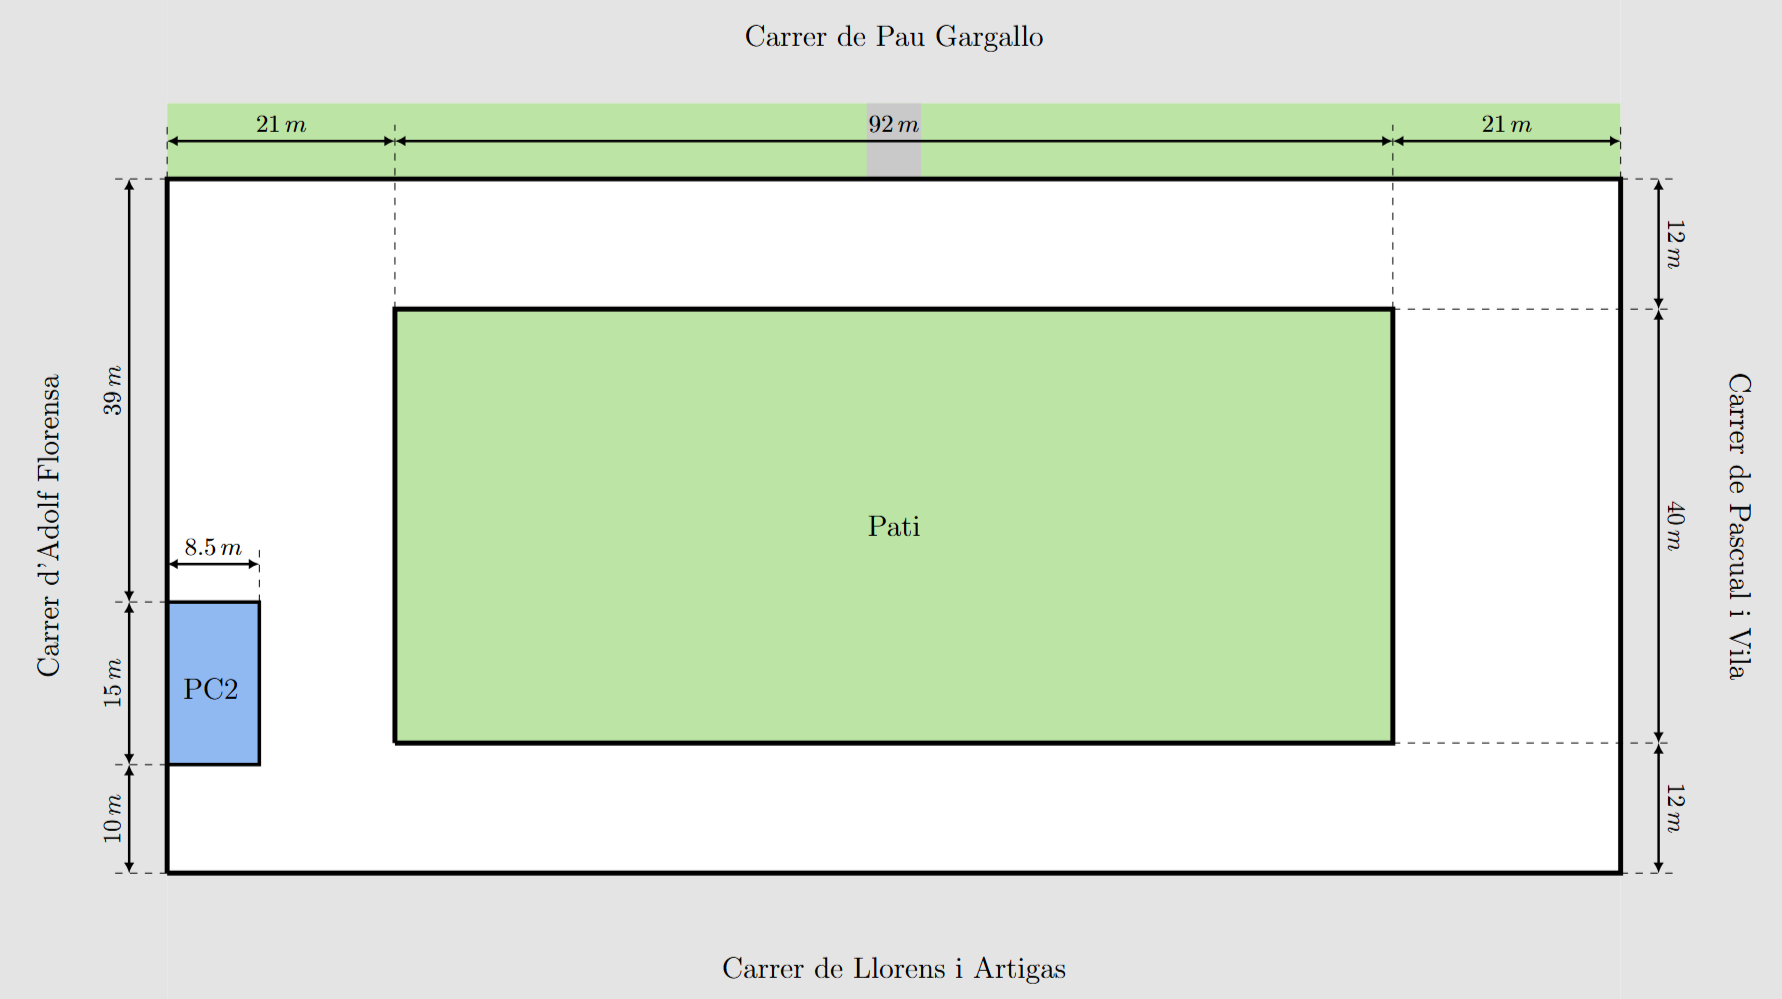

En particular, tenim que les parets orientades cap al carrer de Llorens i Artigas ($\Gamma_C$ i $\Gamma_c$ del dibuix posterior) seran les que més s'escalfin, seguides de les parets orientades cap al carrer de Pascual i Vila ($\Gamma_D$ i $\Gamma_d$). Per contra, les parets orientades cap al carrer de Pau Gargallo ($\Gamma_A$ i $\Gamma_a$) i el carrer d'Adolf Florensa ($\Gamma_B$ i $\Gamma_b$) estaran més fredes.

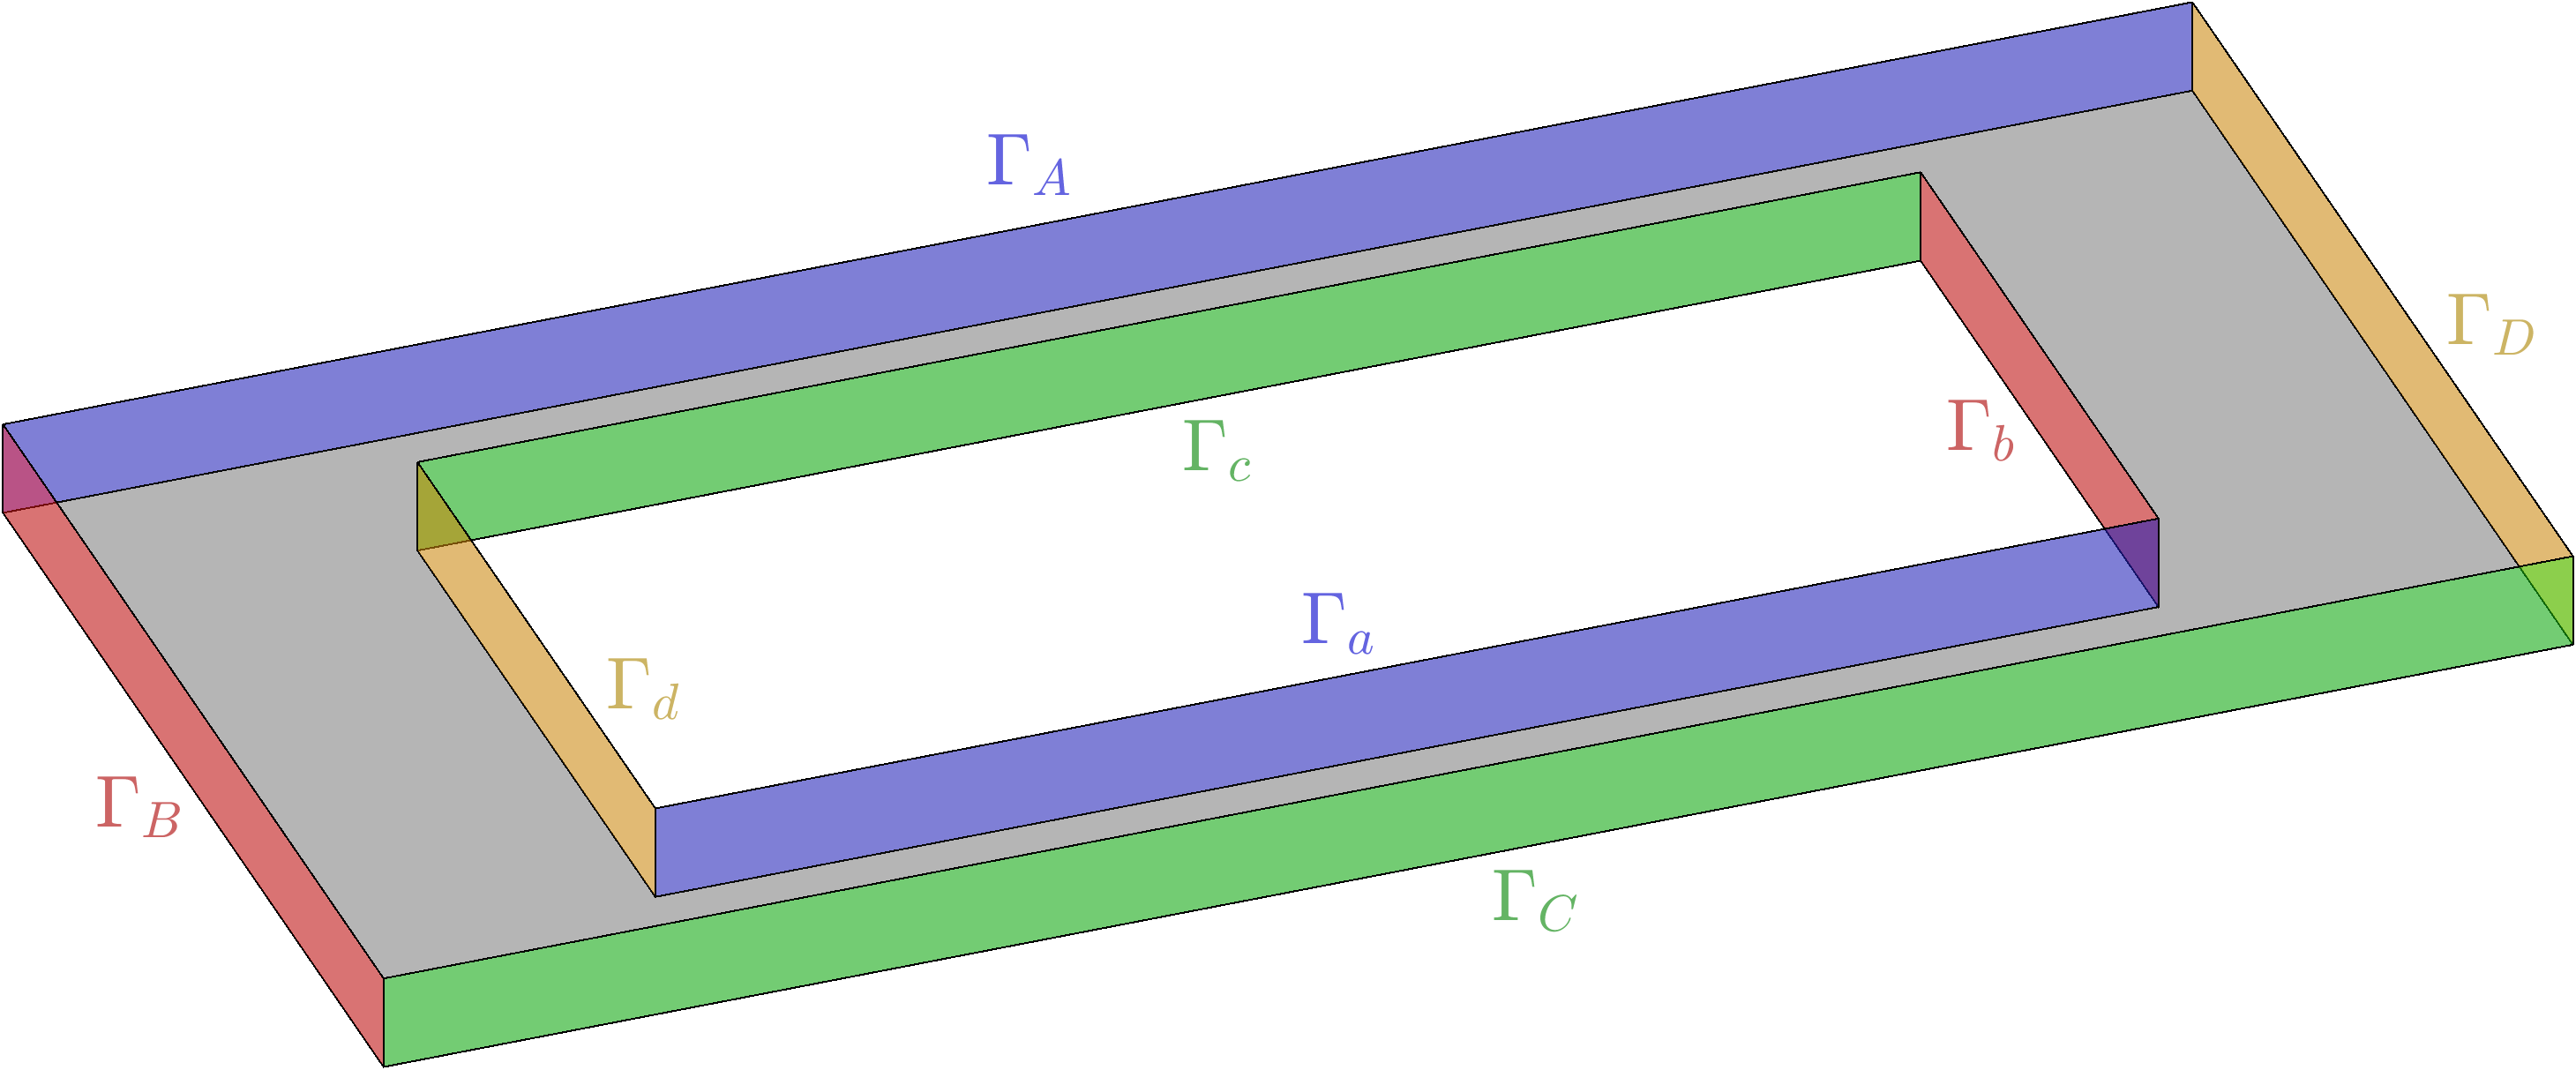

De la mateixa manera, el sostre ($\Gamma_E$) estarà molt més calent que el terra ($\Gamma_F$).

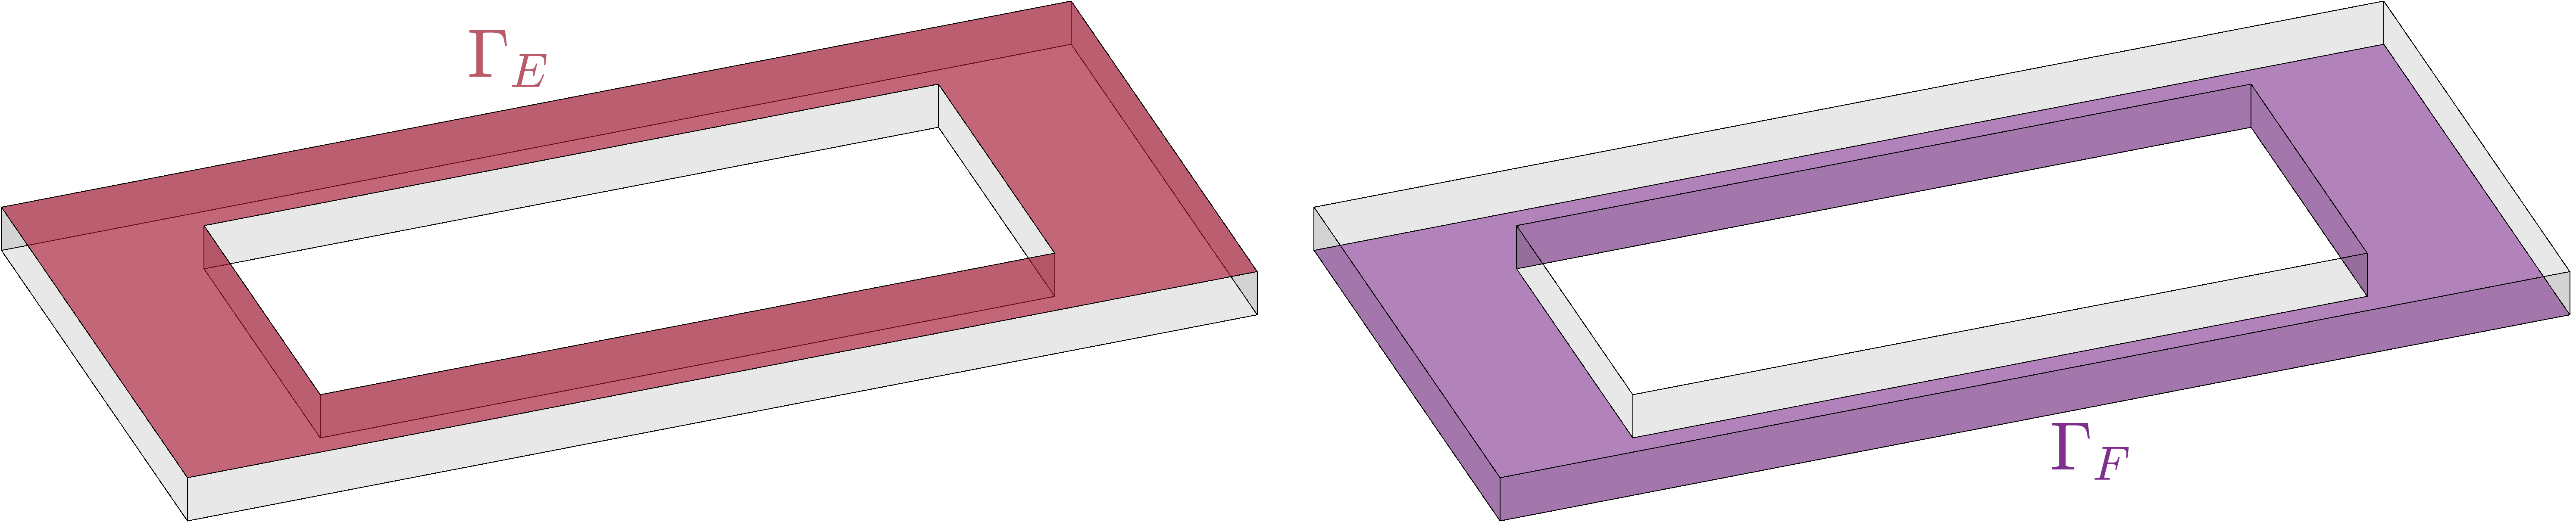

Sabem que les parets, el sostre i el terra de la FME són d'un material que reté molt bé la calor, i volem saber quina serà la temperatura estacionària. En particular, l'objectiu, és determinar quina serà la temperatura mitjana estacionària de l'aula PC2.

Per esbrinar-la, primer haureu de resoldre la següent equació homogènia estacionària

$$
\left\{
\begin{aligned}
&\Delta u(x,y,z) = 0,\quad \forall (x,y,z)\in \Omega\\
& u(x,y,z) = T_a,\quad \forall (x,y,z)\in \Gamma_A \cup \Gamma_a\\
& u(x,y,z) = T_b,\quad \forall (x,y,z)\in \Gamma_B \cup \Gamma_b\\
& u(x,y,z) = T_c,\quad \forall (x,y,z)\in \Gamma_C \cup \Gamma_c\\
& u(x,y,z) = T_d,\quad \forall (x,y,z)\in \Gamma_D \cup \Gamma_d\\
& u(x,y,z) = T_e,\quad \forall (x,y,z)\in \Gamma_E\\
& u(x,y,z) = T_f,\quad \forall (x,y,z)\in \Gamma_F\\
\end{aligned}
\right.
$$

tot utilitzant el mètode de Jacobi per resoldre el problema de diferències finites. $T_a$, $T_b$, $T_c$, $T_d$, $T_e$ i $T_f$ són constants que dependran del problema i que trobareu especificades al fitxer TemperaturaVora.pdf a Atenea.

&nbsp;

La malla de punts que haureu d'utilitzar ha de ser de $(N+1) \times (M+1) \times (P+1)$ punts equiespaitas, amb $N = 268$, $M = 128$ i $P=12$, de manera que l'increment $h$ que considereu és de $0.5\, m$, ja que les dimensions aproximades de l'FME són de $134\,m$ en el seu cantó llarg, $64\,m$ en el seu cantó curt i $6\, m$ d'alçada. Tot i que hi haurà nodes (aquells que es troben al pati) que no serà necessari considerar, ja que només ens interessa la temperatura a l'interior de l'edifici.



**L'aula PC2:**

El model que considerarem de la FME només inclou la planta principal (de $3\,m$ d'alçada) i el primer pis (també de $3\,m$ d'alçada). Així doncs, assumirem que la PC2 es troba a la planta principal i que, per tant, té $3\,m$ d'alçada. Teniu més detall de les seves dimensions a la primera figura.

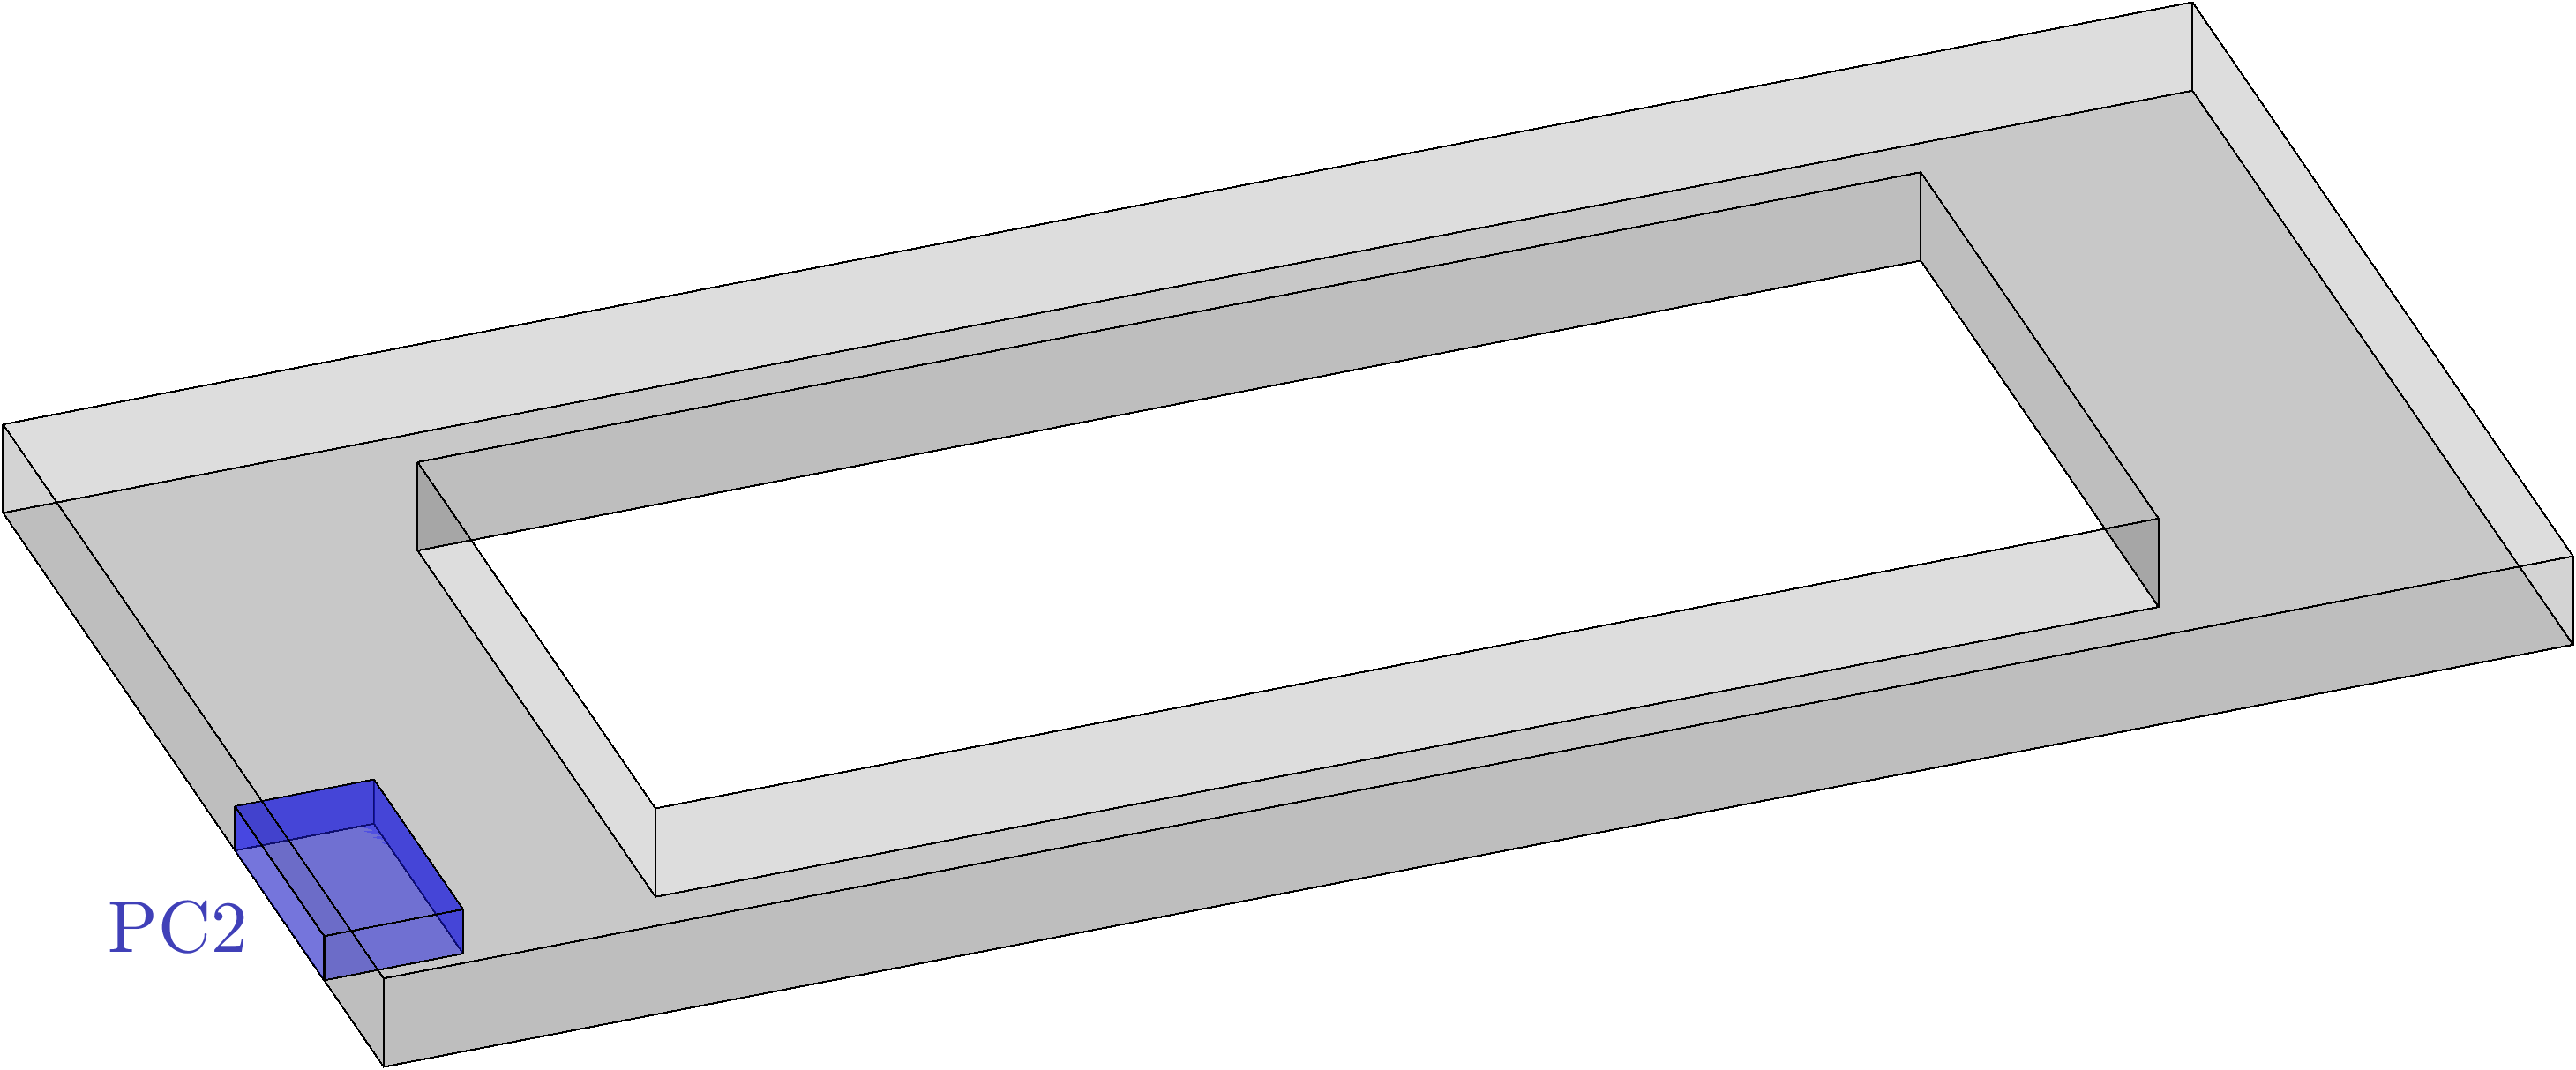

**Nodes a les interseccions de parets:**

D'igual manera que hem vist als exemples del mètode de les diferències finites pel cas 2D, aquells nodes que estiguin a més d'una frontera se'ls haurà d'assignar el valor mitja de les temperatures d'aquestes.

Per exemple, si $(x_i,y_j,z_k)\in\Gamma_A\cap\Gamma_B$ aleshores $u_{i,j,k} = \cfrac{T_a+T_b}{2}$.


&nbsp;

Ara bé, no cal calcular totes les interseccions, ja que els únics nodes que pertanyen a la intersecció de parets, sostre o terra que intervindran, són els de les interseccions de les parets interiors de la FME (les que donen al patí). Les podeu veure en vermell a la següent figura:

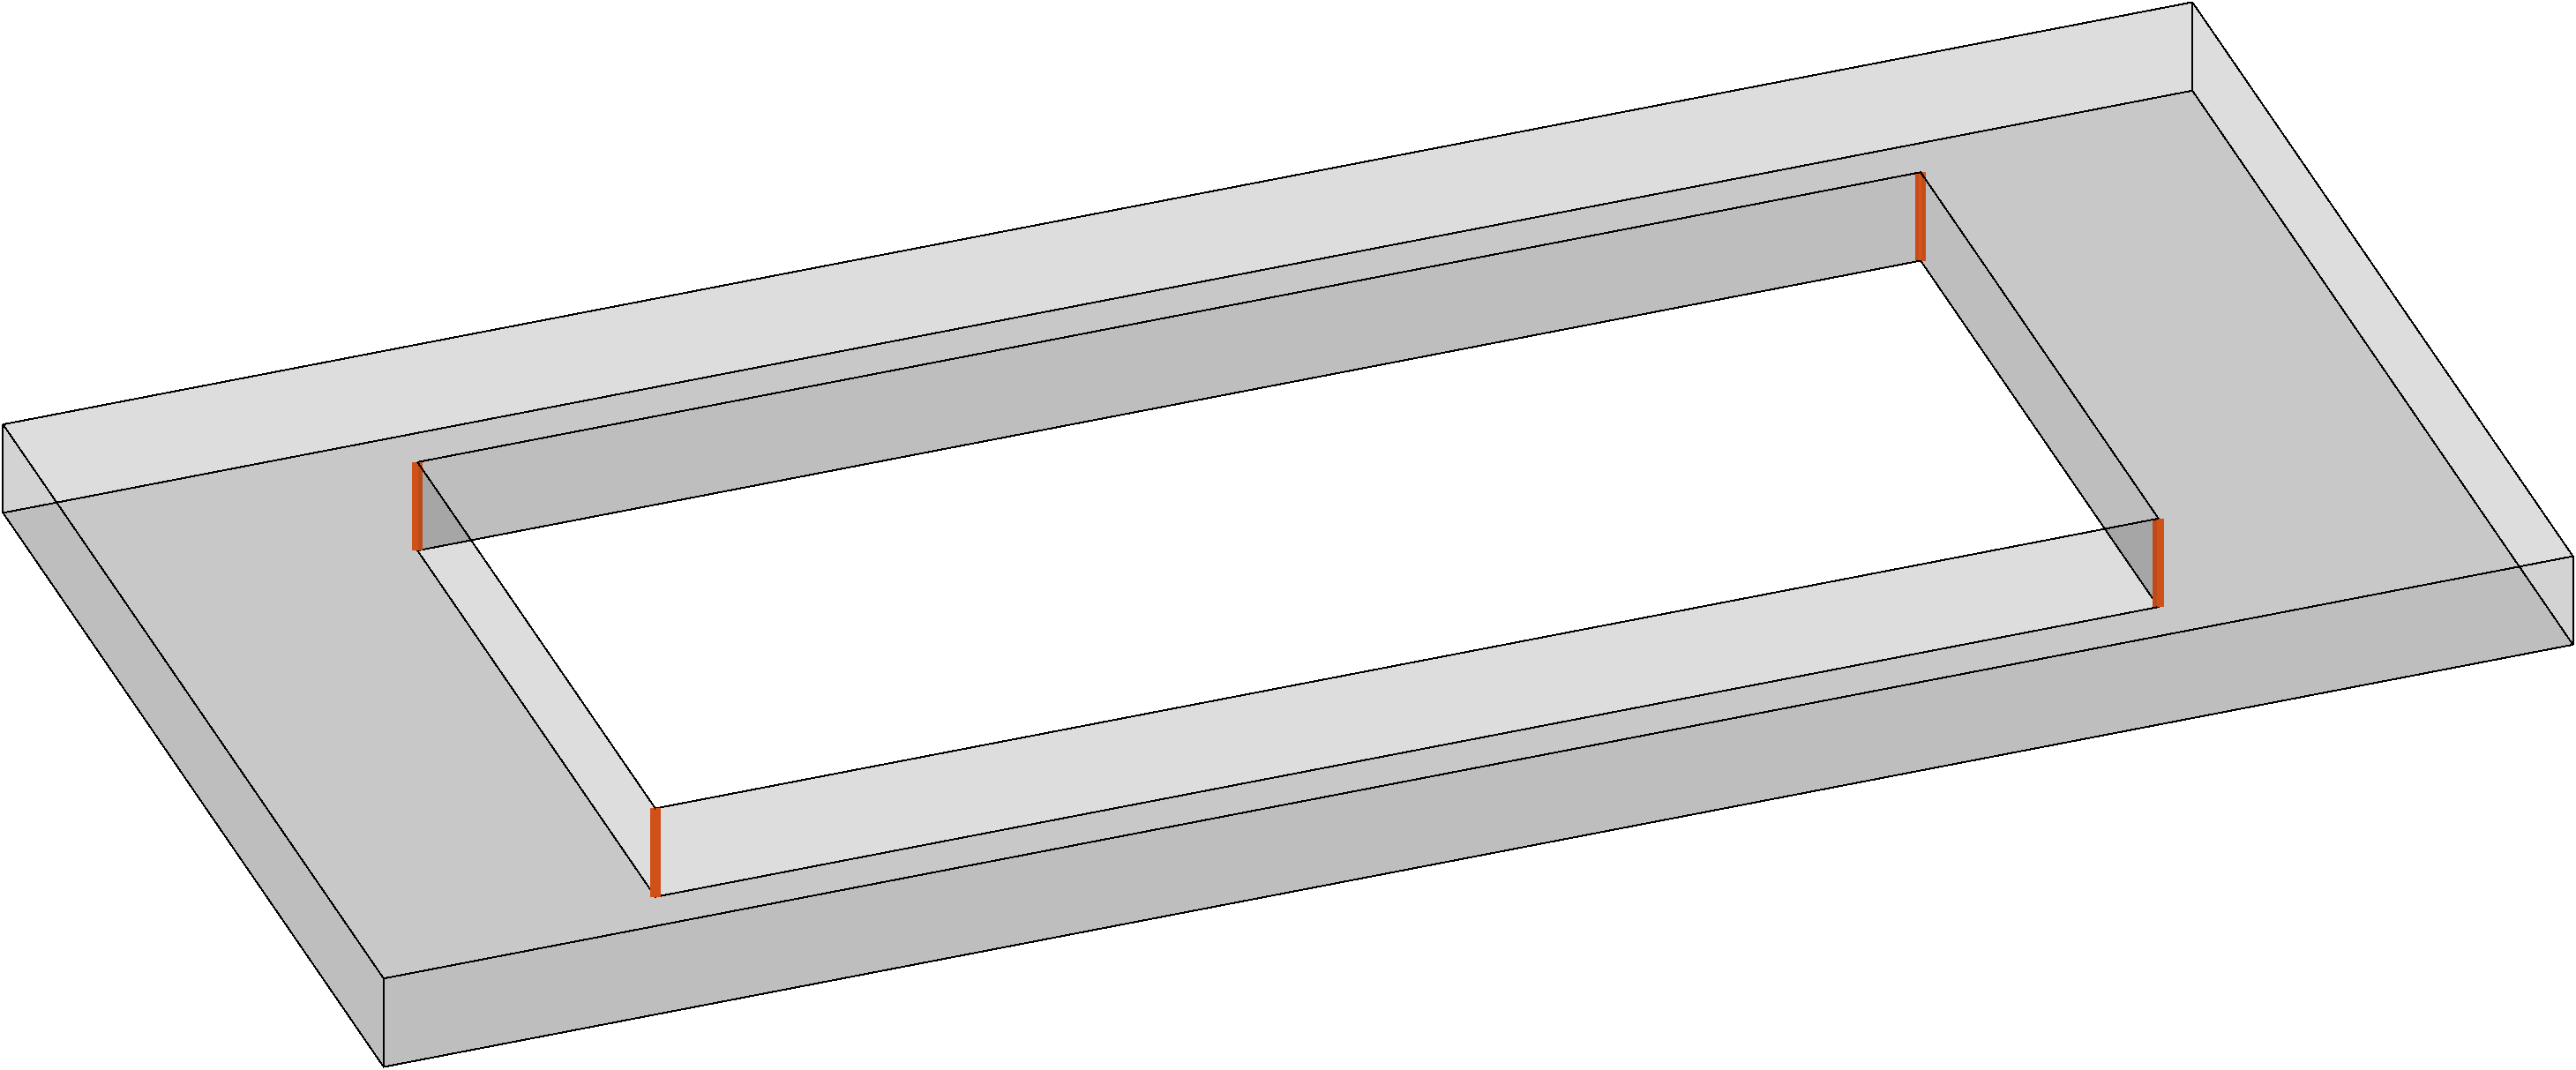

**Condició inicial:**

Com a condició inicial $u_{i,j,k}^{(0)}$ prendrem el valor 25.5º C.

&nbsp;


**Convergència del mètode:**

Finalment, utilitzarem com a criteri de convergència del mètode de Jacobi la condició:

$$
    \max_{i,j,k} |u_{ijk}^{(k+1)} -u_{ijk}^{(k)}| < 10^{-8}.
$$

&nbsp;

**Resultat final:**

Un cop resolta l'equació haureu de determinar la temperatura mitjana de l'aula PC2 calculant la mitjana de temperatura dels nodes que es troben a l'aula PC2 (és a dir, haureu de fer la mitjana dels valors $u_{ijk}$ tals que $(x_i,y_j,z_k)$ pertanyin a l'aula PC2, incloent-hi les fronteres).

Doneu també el nombre d'iteracions que heu fet per arribar a la solució.

&nbsp;

In [ ]:
#### Espai per fer l'exercici 2:
import numpy as np
Ta, Tb, Tc, Td, Te, Tf = 20.4, 20.4, 32.6, 26.3, 33, 18
N, M, P = 268, 128, 12

u = np.ones((N+1, M+1, P+1))*25.5 #inicialitzem la malla amb la temperatura interior a tot arreu

#adjustem les fronteres de Dirichlet, que romandran constants
#out
u[0, :, :] = Tb
u[226, 25:104, :] = Tb
u[-1, :, :] = Td
u[42, 25:104, :] = Td
u[:, 0, :] = Tc
u[43:226, 104, :] = Tc
u[:, -1, :] = Ta
u[43:226, 24, :] = Ta

#in
u[42, 24, :] = (Td + Ta) / 2
u[42, 104, :] = (Tc + Ta) / 2
u[226, 24, :] = (Td + Tb) / 2
u[226, 104, :] = (Tc + Tb) / 2

#floor and ceil
u[:, :, 0] = Tf
u[:, :, -1] = Te



#iterem fins la tolerància desitjada cada bloc
for iter in range(2000):
  u_old = u.copy()

  #left
  u[1:42, 1:M, 1:P] = (
      u_old[2:43, 1:M, 1:P] + u_old[0:41, 1:M, 1:P] +
      u_old[1:42, 2:M+1, 1:P] + u_old[1:42, 0:M-1, 1:P] +
      u_old[1:42, 1:M, 2:P+1] + u_old[1:42, 1:M, 0:P-1]
  ) / 6

  #right
  u[227:N, 1:M, 1:P] = (
      u_old[228:N+1, 1:M, 1:P] + u_old[226:N-1, 1:M, 1:P] +
      u_old[227:N, 2:M+1, 1:P] + u_old[227:N, 0:M-1, 1:P] +
      u_old[227:N, 1:M, 2:P+1] + u_old[227:N, 1:M, 0:P-1]
  ) / 6

  #bot
  u[42:227, 1:24, 1:P] = (
      u_old[43:228, 1:24, 1:P] + u_old[41:226, 1:24, 1:P] +
      u_old[42:227, 2:25, 1:P] + u_old[42:227, 0:23, 1:P] +
      u_old[42:227, 1:24, 2:P+1] + u_old[42:227, 1:24, 0:P-1]
  ) / 6

  #top
  u[42:227, 105:M, 1:P] = (
      u_old[43:228, 105:M, 1:P] + u_old[41:226, 105:M, 1:P] +
      u_old[42:227, 106:M+1, 1:P] + u_old[42:227, 104:M-1, 1:P] +
      u_old[42:227, 105:M, 2:P+1] + u_old[42:227, 105:M, 0:P-1]
  ) / 6


  #sortim del bucle si arribem a la tolerància dessitjada
  if np.max(np.abs(u - u_old)) < 1e-8:
    print(iter)
    break

#calculem la temperatura mitjana de la PC2
temppc2 = np.sum(u[ :18, 20:51, :7])/(18*31*7)
print(temppc2)



##### Funció auxiliar per dibuixar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plotFME(U,umin=None, umax=None):
    """
    Visualització interactiva de la temperatura de la FME

    Paràmetres:
    -----------
    U : array 3D
        Dades a visualitzar (shape: [N+1, M+1, P+1], suposem N > M)
    umin, umax : float
        Valors màxims per la colorbar (si és None, s'autoajusten)
    """
    # Dimensions u:
    Np1,Mp1,Pp1 = U.shape


    # Dimensions de la FME:
    x = np.linspace(0, 134, num=Np1)
    y = np.linspace(0, 64, num=Mp1)
    X, Y = np.meshgrid(x, y)

    # Recuperem el factor:
    P = Pp1-1
    scale = P/6;

    # Determinem els límits de les temperatures
    if umin is None:
        umin = np.nanmin(U)
    if umax is None:
        umax = np.nanmax(U)

    # Funció per actualitzar l'slider
    def update(index=0):
        plt.figure(figsize=(14, 6))

        v = U[:, :, int(index*scale)]

        # Mapa de colors:
        plot = plt.pcolor(X, Y, v.T, cmap='RdBu_r', vmin=umin, vmax=umax)

        # Corbes de nivell
        cset = plt.contour(X, Y, v.T, cmap='gray', levels=np.linspace(umin, umax, 10))
        plt.clabel(cset, inline=True)

        # Ajustem aspecte
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(f'Alçada: {index} m')

        # Afegim colorbar
        plt.colorbar(plot, label='Valor')
        plt.show()

    # Creem slider interactiu
    interact(
        update,
        index=FloatSlider(
            min=0,
            max=6,
            step=1/scale,
            value=0,  # Valor inicial
            description='Alçada:',
            continuous_update=False  # Només s'actualitza al deixar anar l'slider
        )
    )


Exemple d'ús:

In [ ]:
# Fem nan els valors del pati abans de dibuixar-los:
u[43:226, 25:104, :] = np.nan

# Dibuixem:
plotFME(u)